In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "data.csv"

**#Objective: Predict Customer Life-time Value for an Auto Insurance Company
For an Auto Insurance company, predict the customer life time value (CLV). CLV is the total revenue the client will
derive from their entire relationship with a customer. Because we don't know how long each customer relationship will
be, we make a good estimate and state CLV as a periodic value — that is, we usually say “this customer's 12-month
(or 24-month, etc) CLV is $x”.**

In [27]:
#Importing tidyverse and reading the data from source
library("tidyverse")
#data=read_csv("../input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
data<-read_csv("../input/data.csv")
class(data)

Parsed with column specification:
cols(
  .default = col_character(),
  `Customer Lifetime Value` = col_double(),
  Income = col_double(),
  `Monthly Premium Auto` = col_double(),
  `Months Since Last Claim` = col_double(),
  `Months Since Policy Inception` = col_double(),
  `Number of Open Complaints` = col_double(),
  `Number of Policies` = col_double(),
  `Total Claim Amount` = col_double()
)

See spec(...) for full column specifications.



[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [80]:
#Importing relevant packages
library(caret)
library(ggplot2)
library(dplyr)
library(Hmisc)
library(broom)
library(glmnet)
library(pastecs)
library(psych)
library(tidyverse)
library(repr)
library(plyr)
library(readr)
#library(funMoeling)

In [6]:
#Here we are checking dimension and structure of the data
#1.Type of the data 2.RowXColumn 3.No. of variables and their type  
dim(data)
str(data)
#descriptive analysis: basic summary statistics
summary(data)
#glimpse(data)
#describe(data)
#chaeck for missing values
sum(is.na(data))

[1] 9134   24

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	9134 obs. of  24 variables:
 $ Customer                     : chr  "BU79786" "QZ44356" "AI49188" "WW63253" ...
 $ State                        : chr  "Washington" "Arizona" "Nevada" "California" ...
 $ Customer Lifetime Value      : num  2764 6980 12887 7646 2814 ...
 $ Response                     : chr  "No" "No" "No" "No" ...
 $ Coverage                     : chr  "Basic" "Extended" "Premium" "Basic" ...
 $ Education                    : chr  "Bachelor" "Bachelor" "Bachelor" "Bachelor" ...
 $ Effective To Date            : chr  "2/24/11" "1/31/11" "2/19/11" "1/20/11" ...
 $ EmploymentStatus             : chr  "Employed" "Unemployed" "Employed" "Unemployed" ...
 $ Gender                       : chr  "F" "F" "F" "M" ...
 $ Income                       : num  56274 0 48767 0 43836 ...
 $ Location Code                : chr  "Suburban" "Suburban" "Suburban" "Suburban" ...
 $ Marital Status               : chr  "Married" "Single" "M

   Customer            State           Customer Lifetime Value
 Length:9134        Length:9134        Min.   : 1898          
 Class :character   Class :character   1st Qu.: 3994          
 Mode  :character   Mode  :character   Median : 5780          
                                       Mean   : 8005          
                                       3rd Qu.: 8962          
                                       Max.   :83325          
   Response           Coverage          Education         Effective To Date 
 Length:9134        Length:9134        Length:9134        Length:9134       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 EmploymentStatus   

[1] 0

In [7]:
#Analysis of Continuous variable
new_data<-data[sapply(data,is.numeric)]
#min-max-median-lower-upper hinge
fivenum(new_data$Income)
fivenum(new_data$Total.Claim.Amount)
fivenum(new_data$Monthly.Premium.Auto)
fivenum(new_data$Months.Since.Last.Claim)
fivenum(new_data$Number.of.Policies)
fivenum(new_data$Number.of.Open.Complaints)
fivenum(new_data$Months.Since.Policy.Inception)
#Univariate analysis<Quantitative measure>
#1.Measure of central tendency 2.Measure of dispersion 3.Skewness 4.Kurtosis
describe(new_data)
stat.desc(new_data)

[1]     0.0     0.0 33889.5 62326.0 99981.0

Warning message:
“Unknown or uninitialised column: 'Total.Claim.Amount'.”


[1] NA NA NA NA NA

Warning message:
“Unknown or uninitialised column: 'Monthly.Premium.Auto'.”


[1] NA NA NA NA NA

Warning message:
“Unknown or uninitialised column: 'Months.Since.Last.Claim'.”


[1] NA NA NA NA NA

Warning message:
“Unknown or uninitialised column: 'Number.of.Policies'.”


[1] NA NA NA NA NA

Warning message:
“Unknown or uninitialised column: 'Number.of.Open.Complaints'.”


[1] NA NA NA NA NA

Warning message:
“Unknown or uninitialised column: 'Months.Since.Policy.Inception'.”


[1] NA NA NA NA NA

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Customer Lifetime Value,1,9134,8004.940475,6.870968e+03,5780.1822,6.631050e+03,3658.8991,1898.007675,83325.38,81427.374,3.03128440,13.8116290,7.189313e+01
Income,2,9134,37657.380009,3.037990e+04,33889.5000,3.572792e+04,42522.4506,0.000000,99981.00,99981.000,0.28679306,-1.0948011,3.178747e+02
Monthly Premium Auto,3,9134,93.219291,3.440797e+01,83.0000,8.734031e+01,26.6868,61.000000,298.00,237.000,2.12284904,6.1875462,3.600216e-01
Months Since Last Claim,4,9134,15.097000,1.007326e+01,14.0000,1.467761e+01,11.8608,0.000000,35.00,35.000,0.27849482,-1.0741586,1.053997e-01
Months Since Policy Inception,5,9134,48.064594,2.790599e+01,48.0000,4.786932e+01,35.5824,0.000000,99.00,99.000,0.04015177,-1.1334913,2.919893e-01
Number of Open Complaints,6,9134,0.384388,9.103835e-01,0.0000,1.325944e-01,0.0000,0.000000,5.00,5.000,2.78234898,7.7420578,9.525634e-03
Number of Policies,7,9134,2.966170,2.390182e+00,2.0000,2.541461e+00,1.4826,1.000000,9.00,8.000,1.25292112,0.3615648,2.500924e-02
Total Claim Amount,8,9134,434.088794,2.905001e+02,383.9454,4.026767e+02,213.5753,0.099007,2893.24,2893.141,1.71440258,5.9735064,3.039595e+00


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03
nbr.null,0.000000e+00,2.317000e+03,0.000000e+00,3.140000e+02,8.300000e+01,7.252000e+03,0.000000e+00,0.000000e+00
nbr.na,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,1.898008e+03,0.000000e+00,6.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.900700e-02
max,8.332538e+04,9.998100e+04,2.980000e+02,3.500000e+01,9.900000e+01,5.000000e+00,9.000000e+00,2.893240e+03
range,8.142737e+04,9.998100e+04,2.370000e+02,3.500000e+01,9.900000e+01,5.000000e+00,8.000000e+00,2.893141e+03
sum,7.311713e+07,3.439625e+08,8.514650e+05,1.378960e+05,4.390220e+05,3.511000e+03,2.709300e+04,3.964967e+06
median,5.780182e+03,3.388950e+04,8.300000e+01,1.400000e+01,4.800000e+01,0.000000e+00,2.000000e+00,3.839454e+02
mean,8.004940e+03,3.765738e+04,9.321929e+01,1.509700e+01,4.806459e+01,3.843880e-01,2.966170e+00,4.340888e+02


In [28]:
#Renaming columns
names(data)<-c("Customer","State","CLV","Response","Coverage","Education","Effective.To.Date","EmploymentStatus","Gender","Income","Location.Code","Marital.Status","Monthly.Premium.Auto","Months.Since.Last.Claim","Month.Since.Policy.Inception","Open.Complaints","Policies.Count","Policy.Type","Policy","Renew.Offer.Type","Sales.Channel","Total.Claim.Amount","Vehicle.Class","Vehicle.Size")

In [29]:
#regularized regression
data3<-data#Random Forest
data4<-data#for experimental purpose
#Removing features which would have no impact on CLV prediction
data<- data[,-c(1,7)]
#Removing observations with having negative balance
data<-subset(data,data$Income>=0)# Here we can see no observations with negative balance
dim(data)
dim(data3)

[1] 9134   22

[1] 9134   24

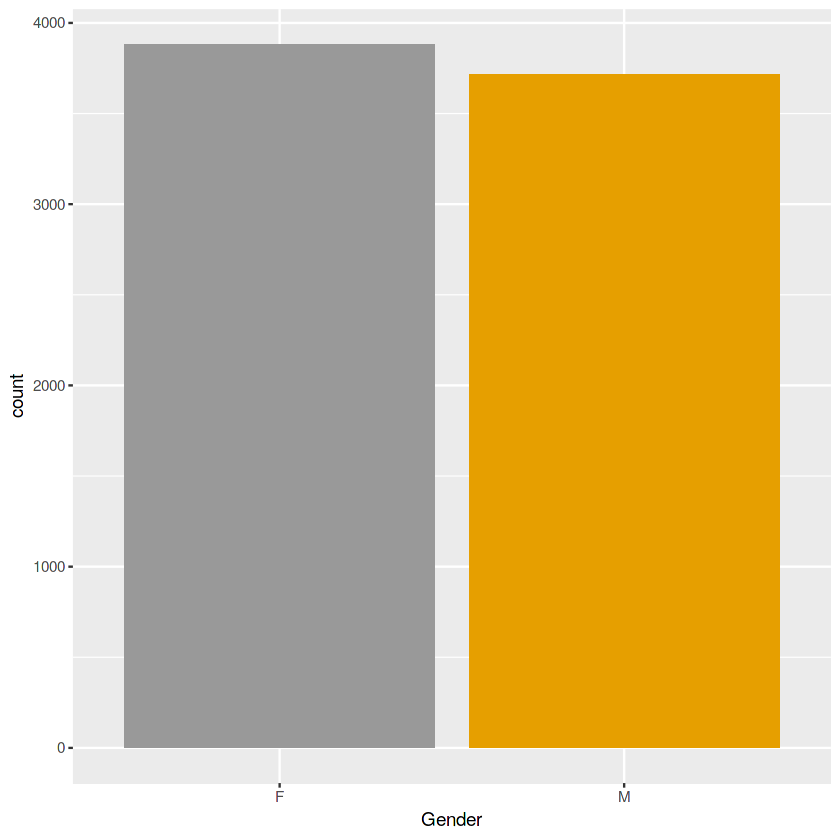

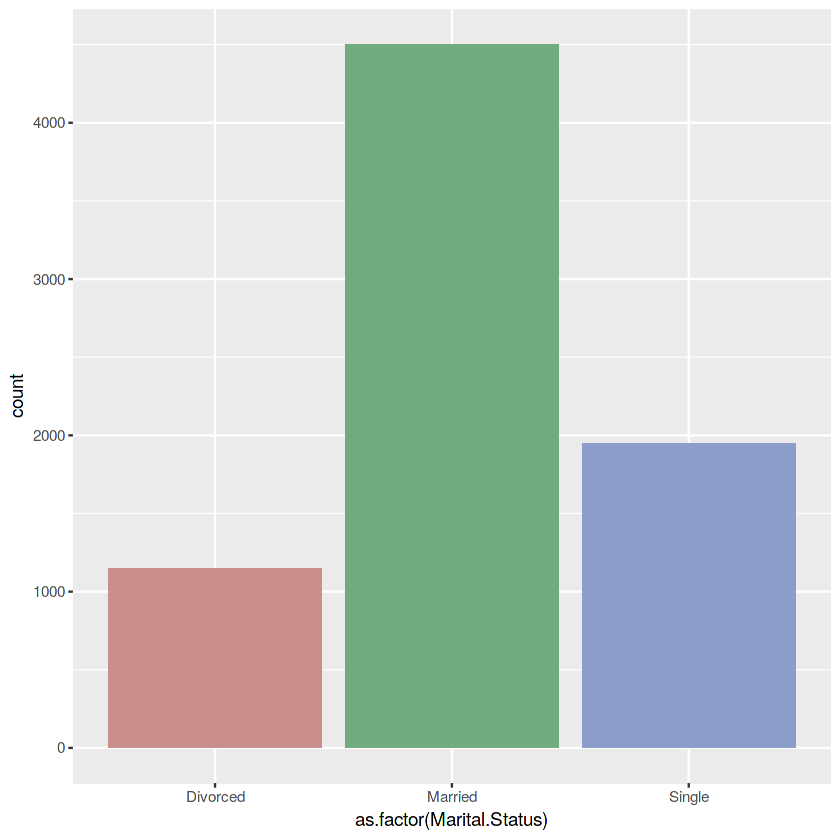

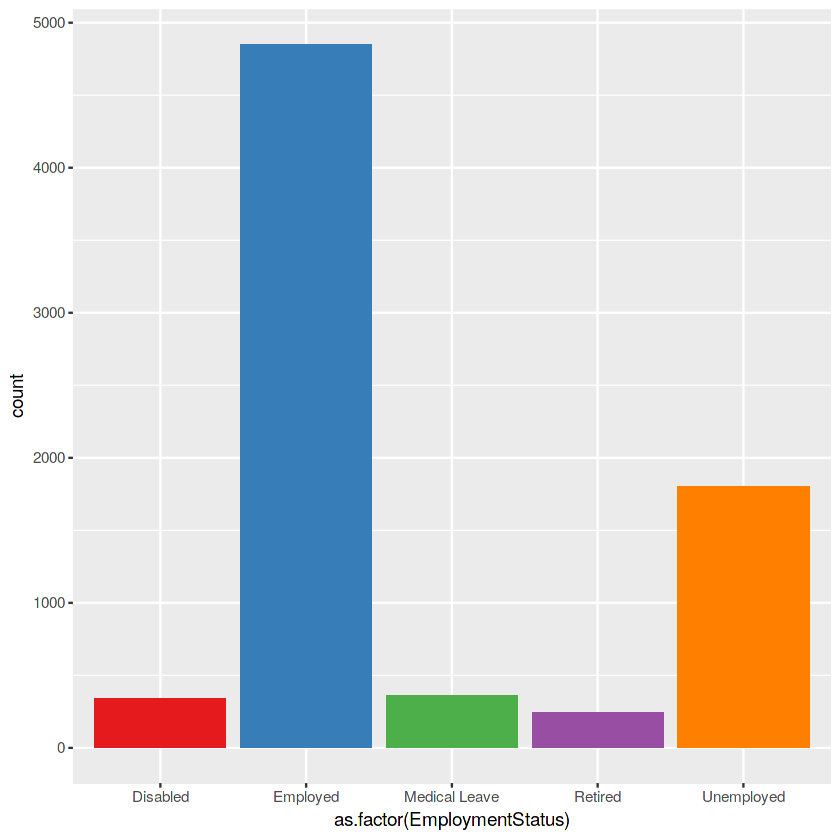

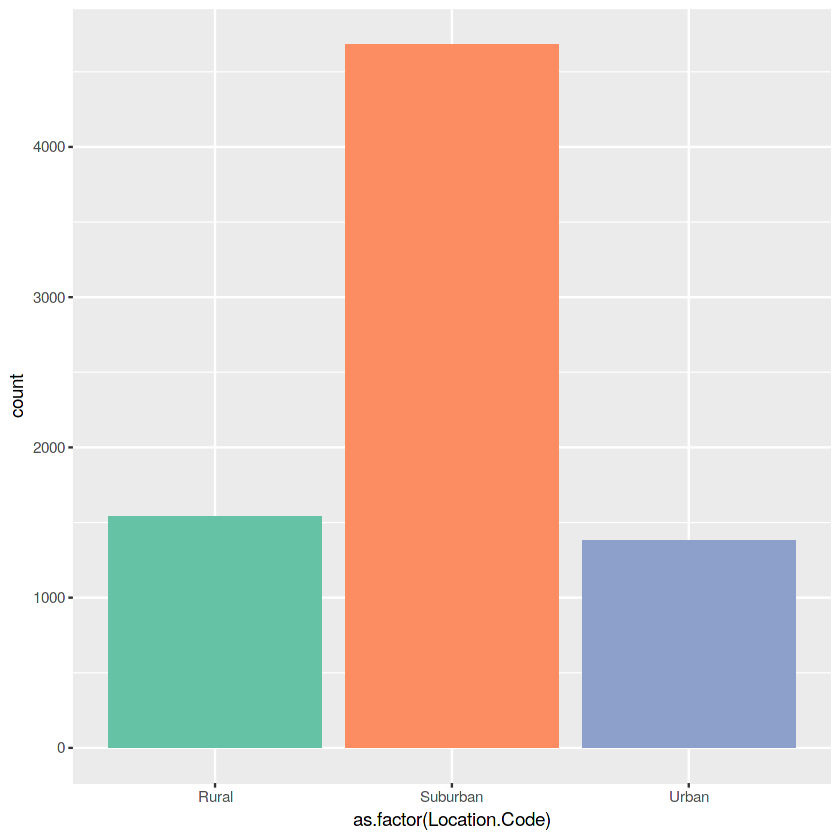

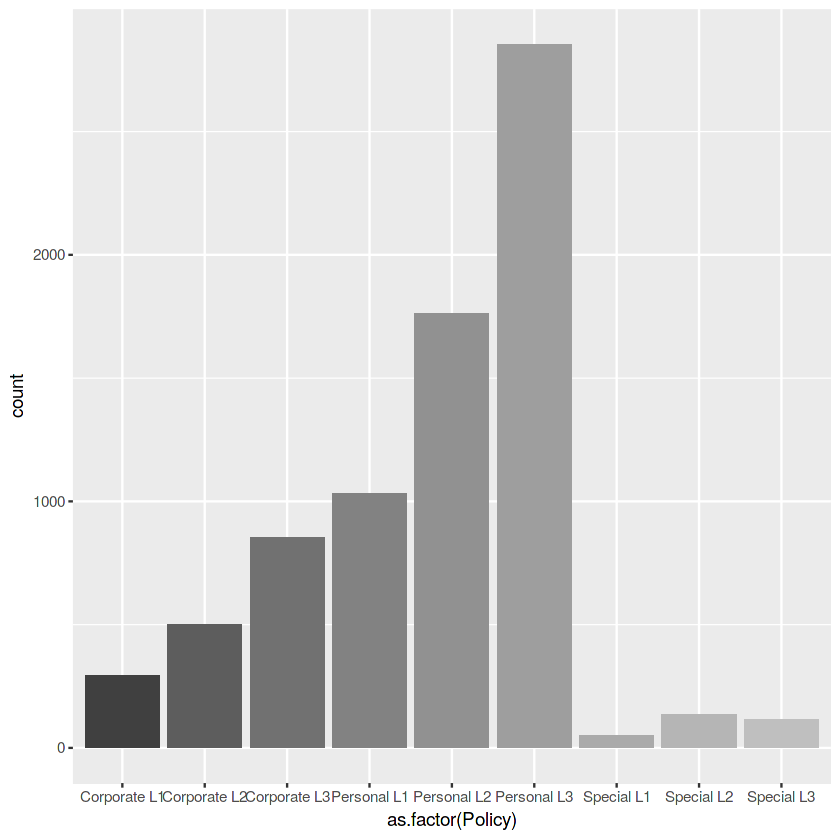

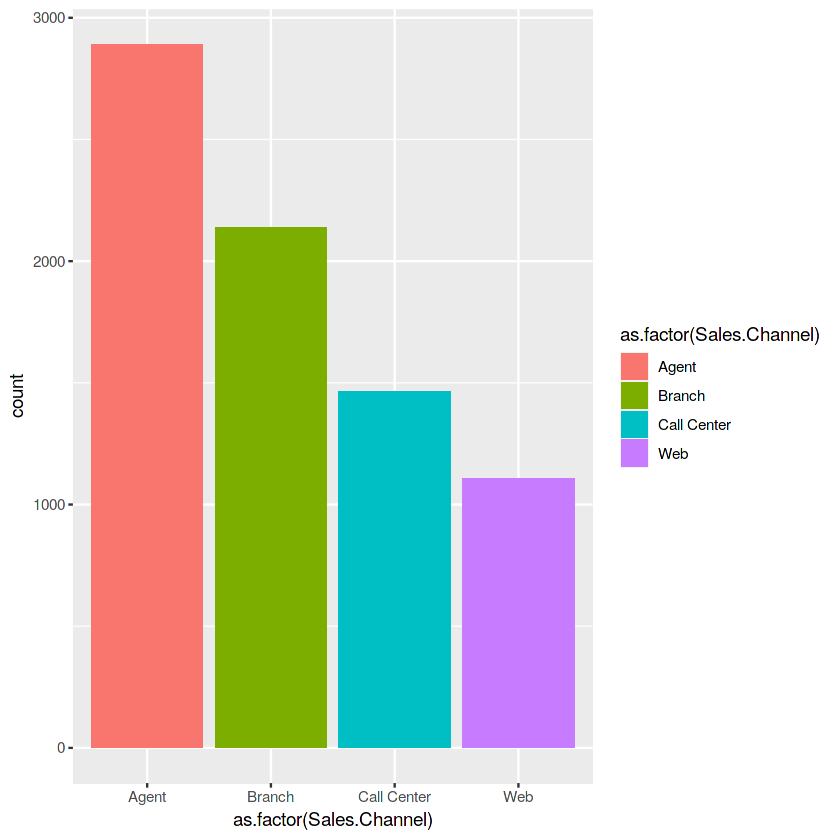

In [13]:
#Univariate analysis<Graphical measure>
#to understand the freuency of important categorical features and its distribution
data %>% ggplot(aes(x=Gender))+geom_bar(fill=c('#999999','#E69F00'))
data %>% ggplot(aes(x=as.factor(Marital.Status),fill=as.factor(Marital.Status)))+geom_bar()+scale_fill_hue(c = 40)+theme(legend.position="none")
data %>% ggplot(aes(x=as.factor(EmploymentStatus),fill=as.factor(EmploymentStatus)))+geom_bar()+scale_fill_brewer(palette = "Set1")+theme(legend.position="none")
data %>% ggplot(aes(x=as.factor(Location.Code),fill=as.factor(Location.Code)))+geom_bar()+scale_fill_brewer(palette = "Set2")+theme(legend.position="none")
data %>% ggplot(aes(x=as.factor(Policy),fill=as.factor(Policy)))+geom_bar()+scale_fill_grey(start = 0.25, end = 0.75)+theme(legend.position="none")
data %>% ggplot(aes(x=as.factor(Sales.Channel),fill=as.factor(Sales.Channel)))+geom_bar()

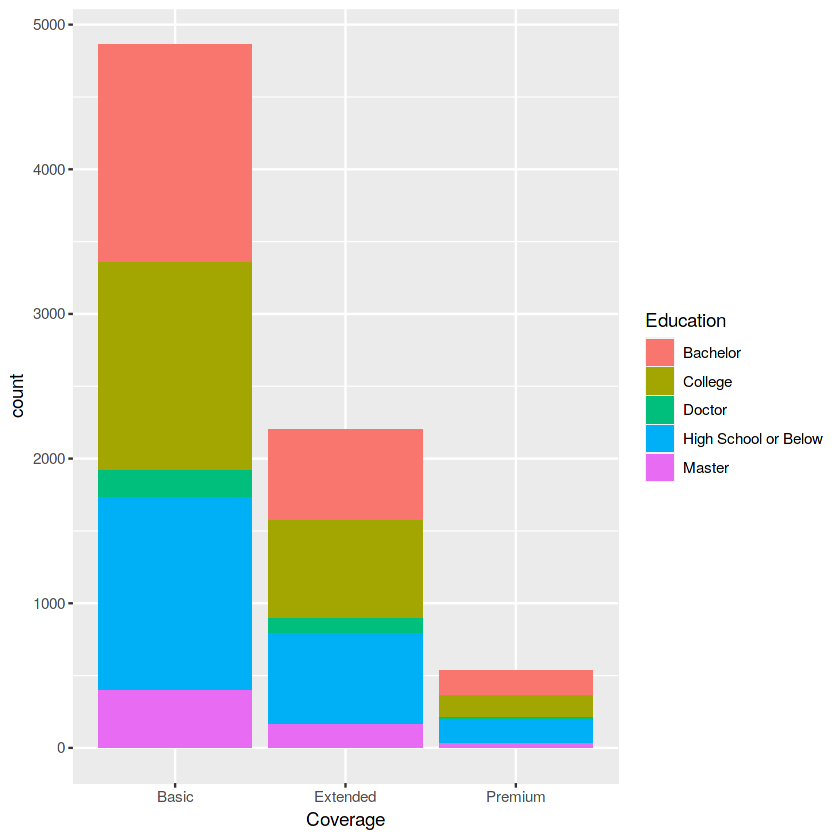

                Gender
EmploymentStatus    F    M
   Disabled       205  136
   Employed      2480 2371
   Medical Leave  186  175
   Retired        107  138
   Unemployed     904  898

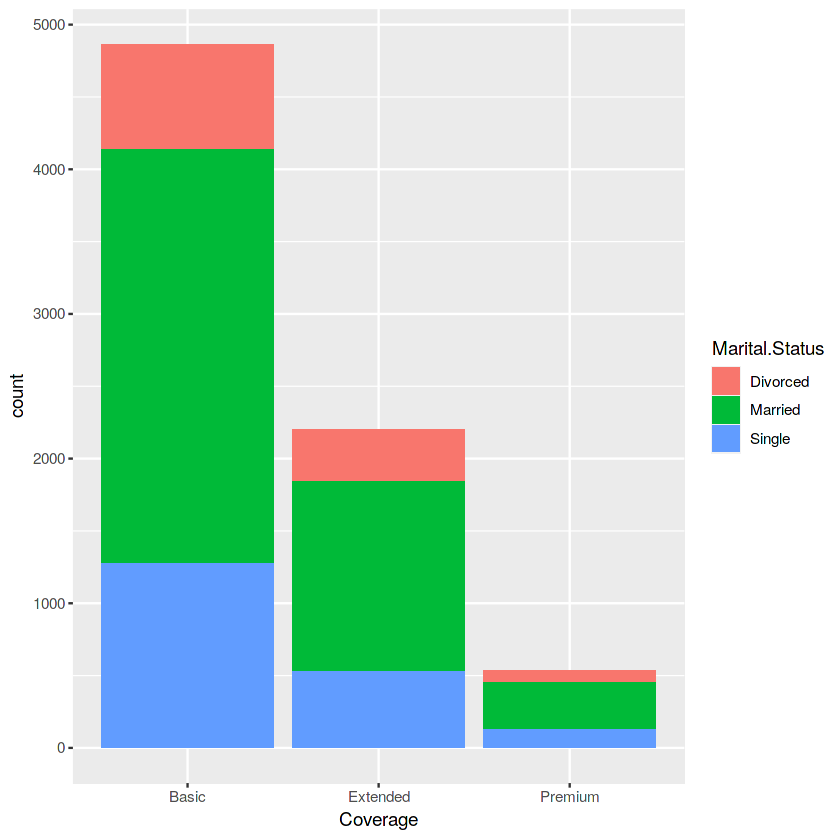

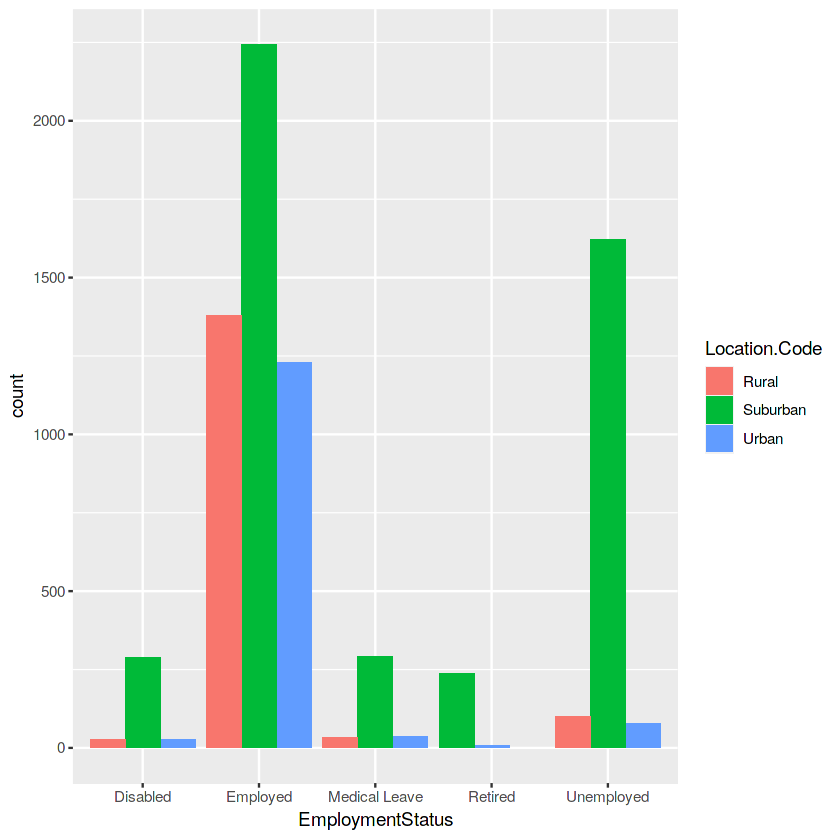

`geom_smooth()` using formula 'y ~ x'



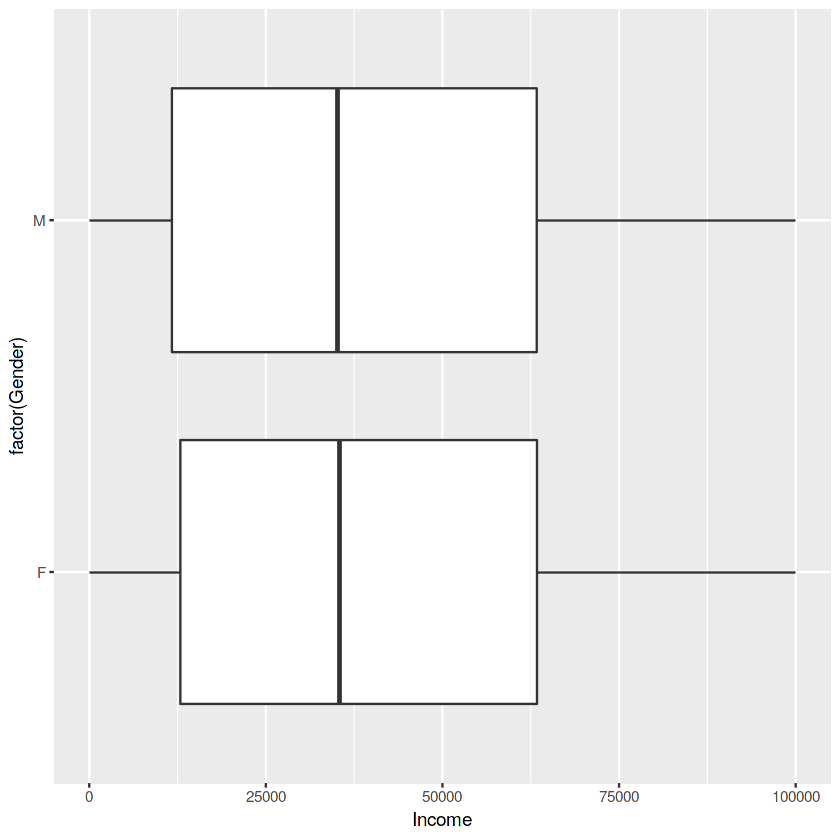

`geom_smooth()` using formula 'y ~ x'



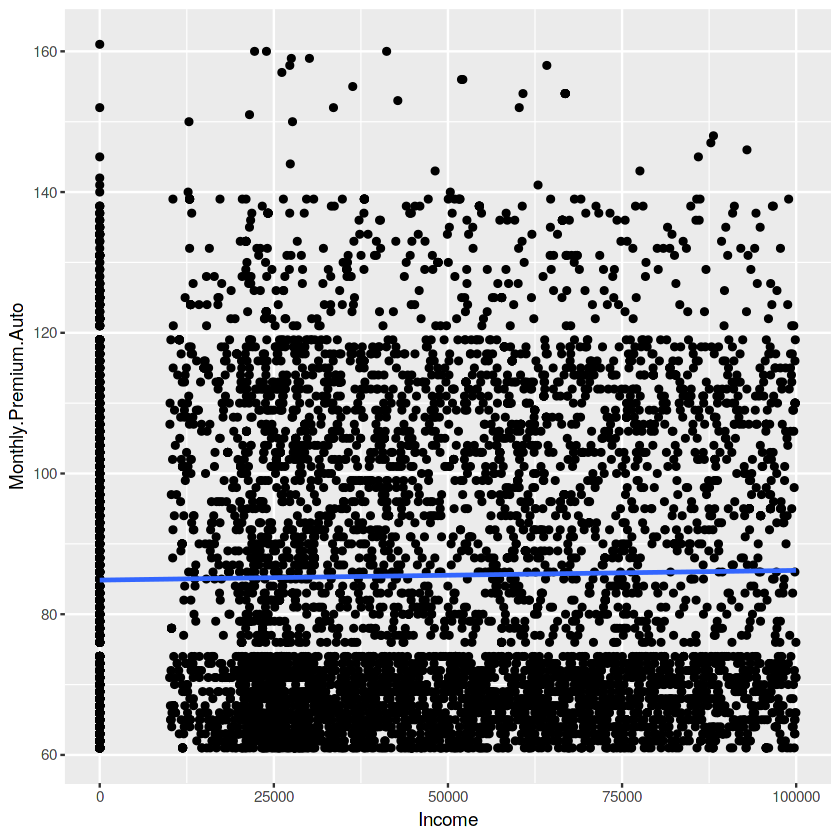

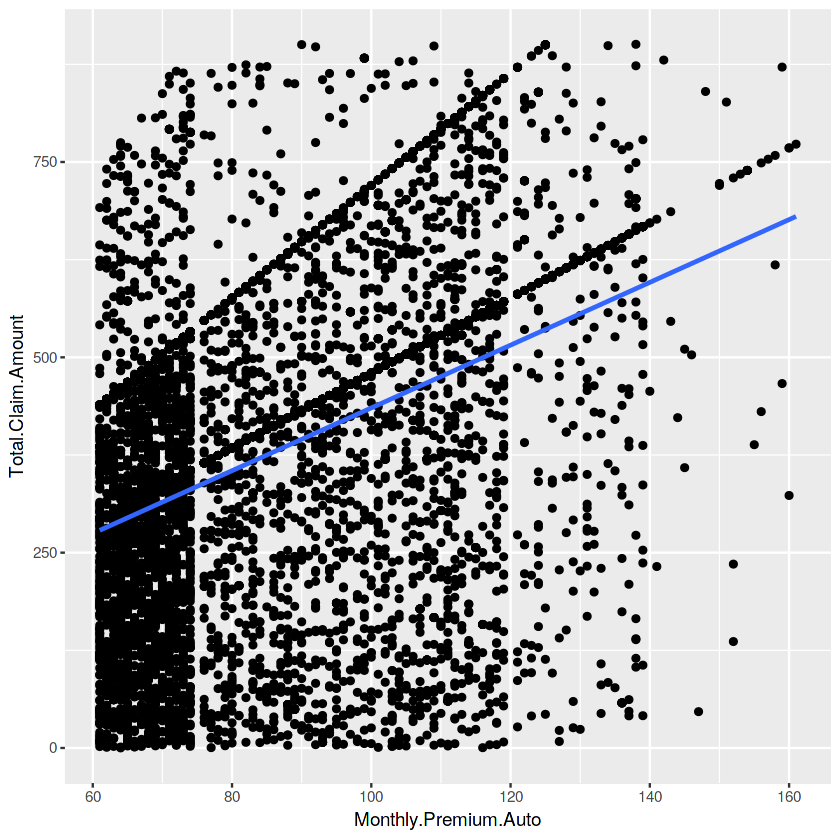

In [14]:
#Bivariate analysis<Graphical measure>
#Categorical-Categorical
ggplot(data, 
       aes(x = Coverage, 
           fill = Education)) + 
  geom_bar(position = "stack")

ggplot(data, 
       aes(x = Coverage, 
           fill = Marital.Status)) + 
  geom_bar(position = "stack")

xtabs(~EmploymentStatus+Gender,data)
ggplot(data, 
       aes(x = EmploymentStatus, 
           fill = Location.Code)) + 
    geom_bar(position = position_dodge(preserve = "single"))

#Categorical-Continuous
ggplot(data)+geom_boxplot(aes(x=Income,y=factor(Gender)))

#Continuous-Continuous
#Here I can see CLV, Monthly.Premium.Auto and Total.Claim.Amount are not having normal distribution and that would affect the performance of the model
data %>% ggplot(aes(x=Income, y=Monthly.Premium.Auto))+geom_point()+stat_smooth(method ="lm", se = FALSE)
data %>% ggplot(aes(x=Monthly.Premium.Auto, y=Total.Claim.Amount))+geom_point()+stat_smooth(method ="lm", se = FALSE)

                                    Income Monthly.Premium.Auto
Income                        1.0000000000         0.0196310622
Monthly.Premium.Auto          0.0196310622         1.0000000000
Months.Since.Last.Claim      -0.0340552158        -0.0113517748
Month.Since.Policy.Inception  0.0009696223         0.0095872485
Open.Complaints               0.0023616854        -0.0200936339
Policies.Count               -0.0055171524        -0.0007420078
Total.Claim.Amount           -0.3789353768         0.4318918916
                             Months.Since.Last.Claim
Income                                  -0.034055216
Monthly.Premium.Auto                    -0.011351775
Months.Since.Last.Claim                  1.000000000
Month.Since.Policy.Inception            -0.051391185
Open.Complaints                          0.014998934
Policies.Count                           0.007062305
Total.Claim.Amount                      -0.013611493
                             Month.Since.Policy.Inception Open.C

NULL

corrplot 0.84 loaded



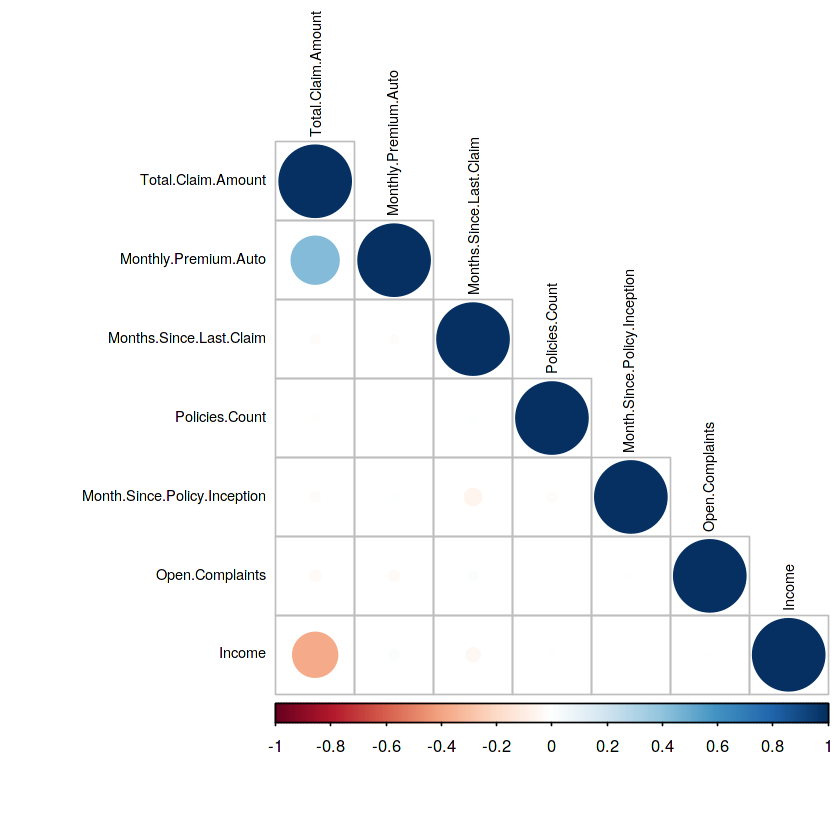

In [15]:
#Bivariate analysis<Quantitative measure>
#subsetting with numerical variables
new_data<-subset(data,select=-c(CLV))
new_data<-new_data[sapply(new_data,is.numeric)]

#find correlation matrix
corr<-cor(new_data)
print(corr)
highlyCorrelated<-findCorrelation(corr, cutoff=0.5)
print(highlyCorrelated)
names<-colnames(highlyCorrelated)
names
library(corrplot)
corrplot(corr, order="FPC", method="circle", type="lower", tl.cex=0.7, tl.col=rgb(0,0,0))

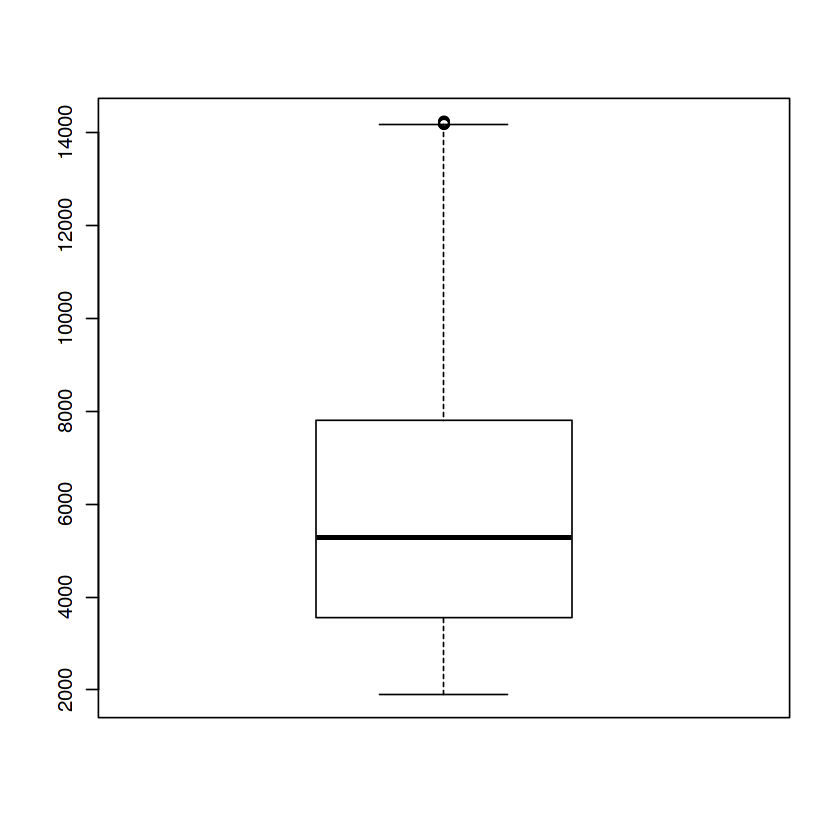

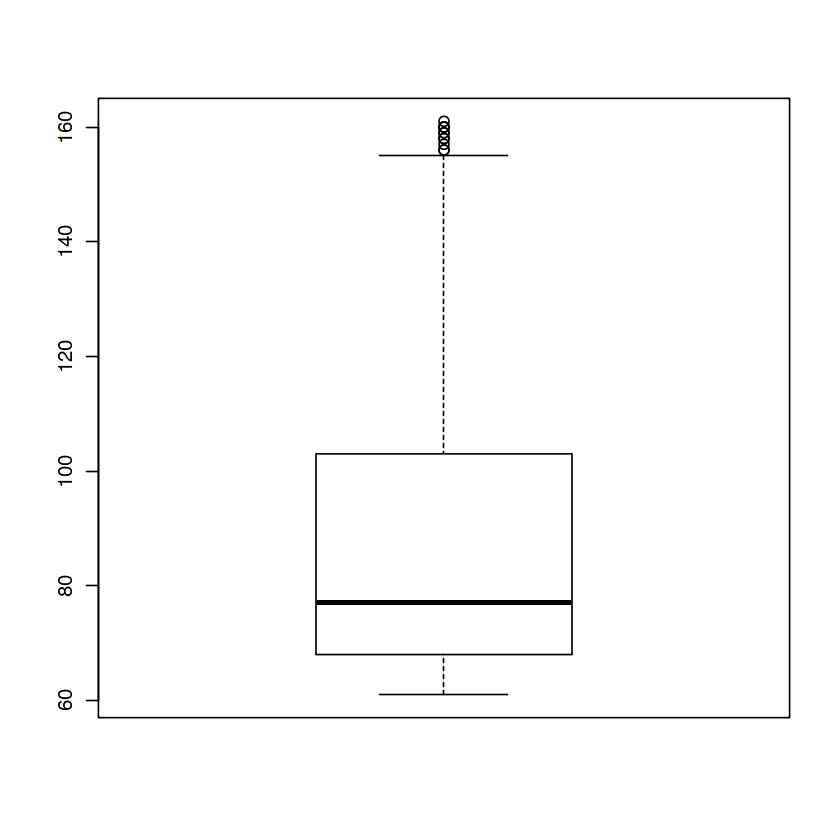

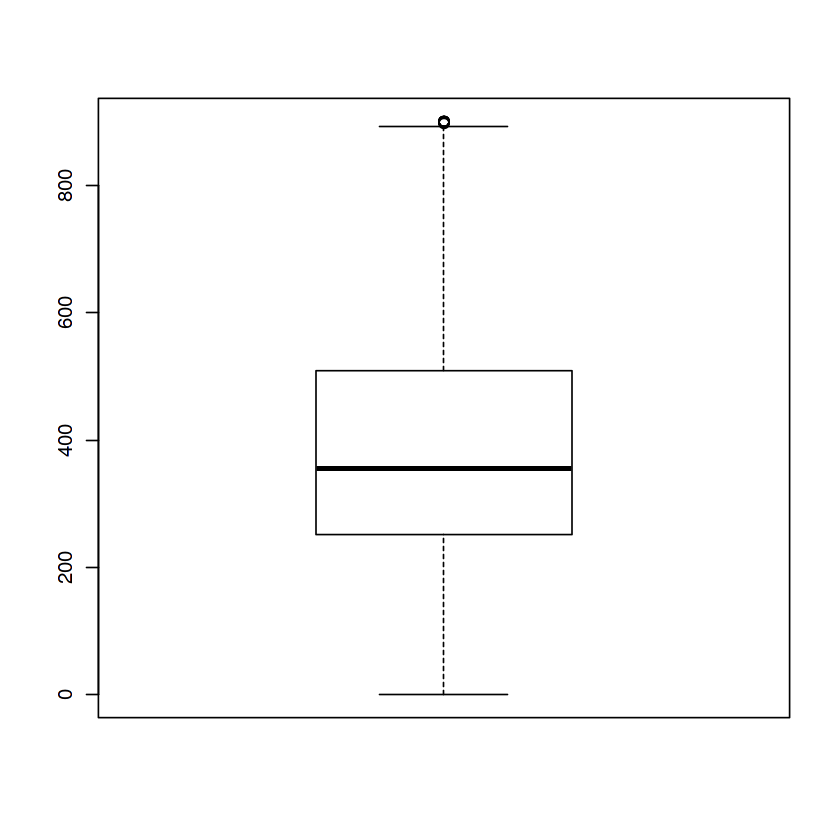

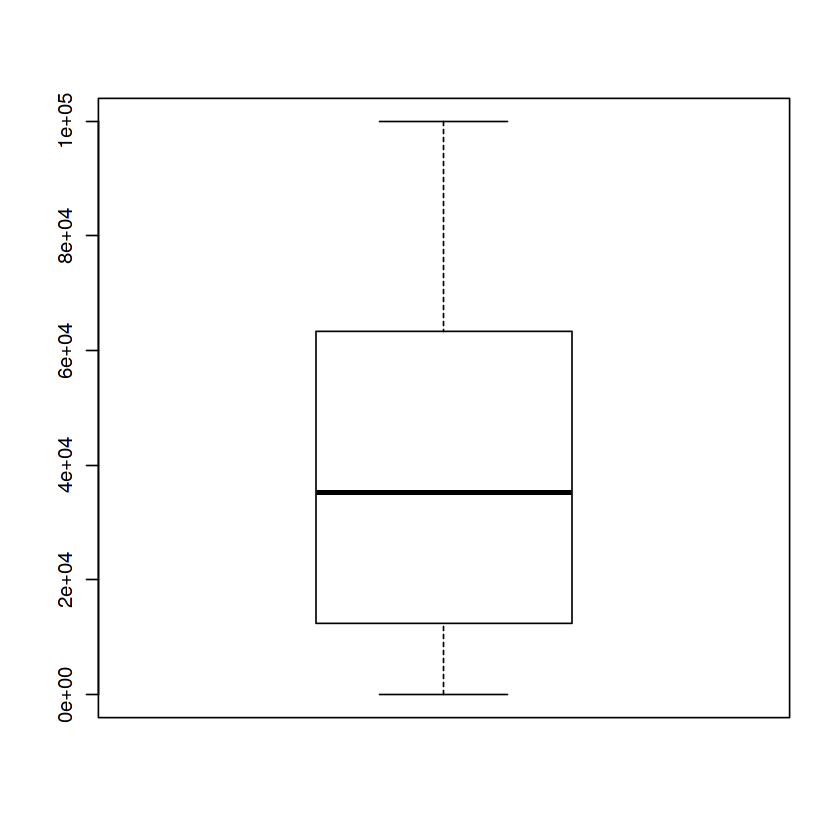

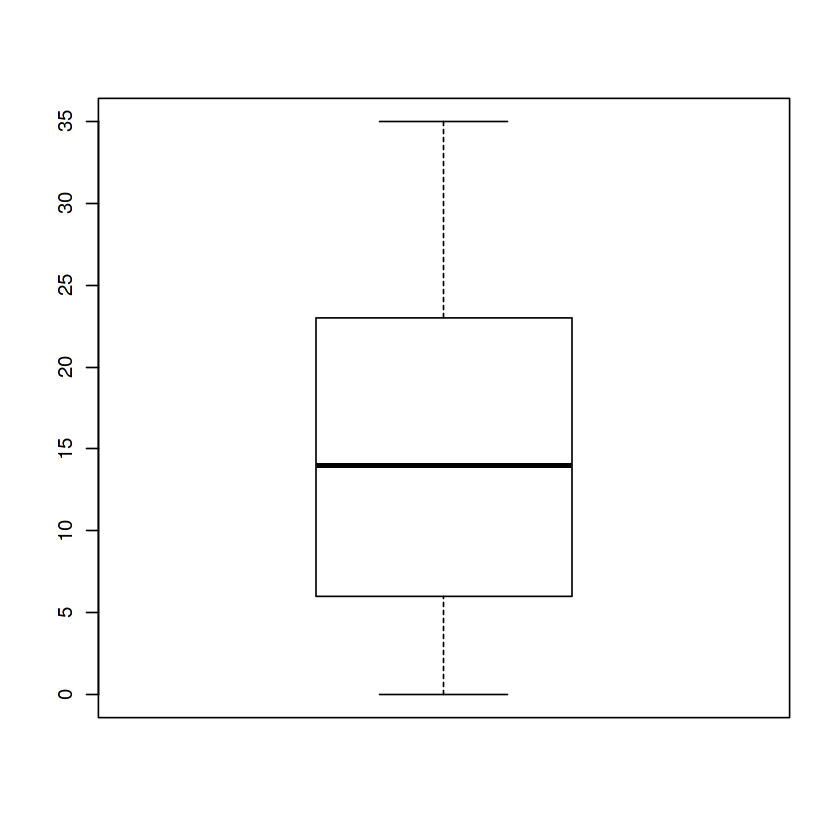

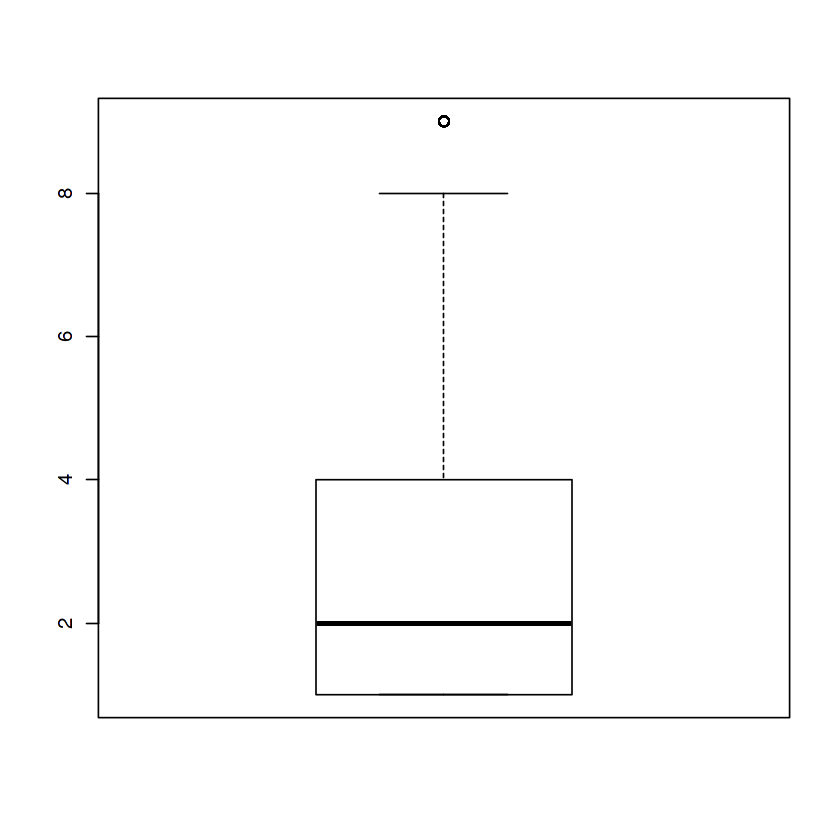

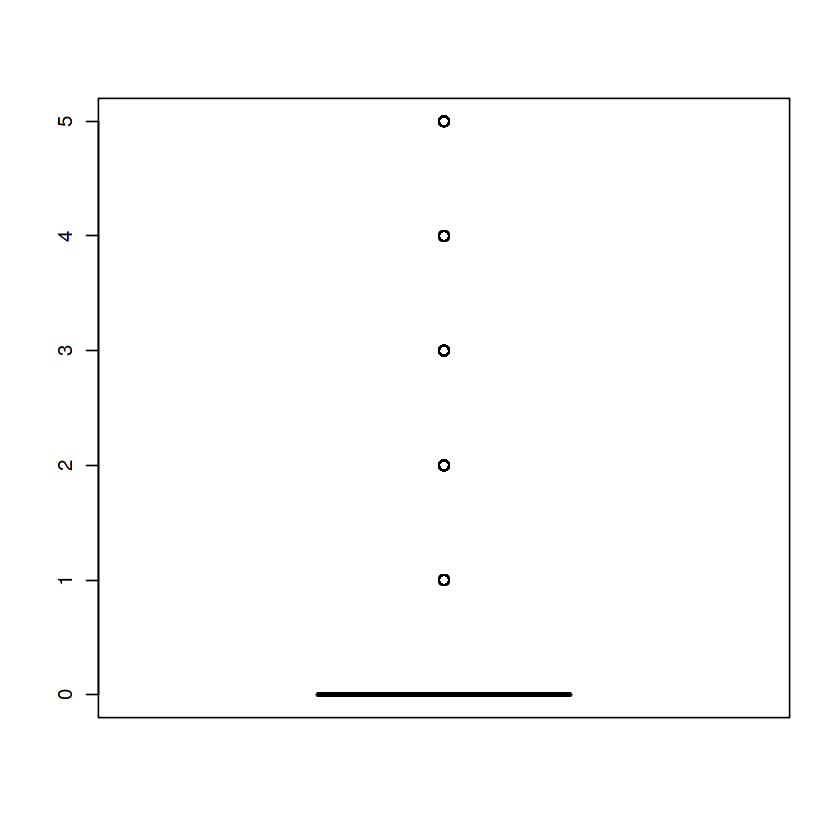

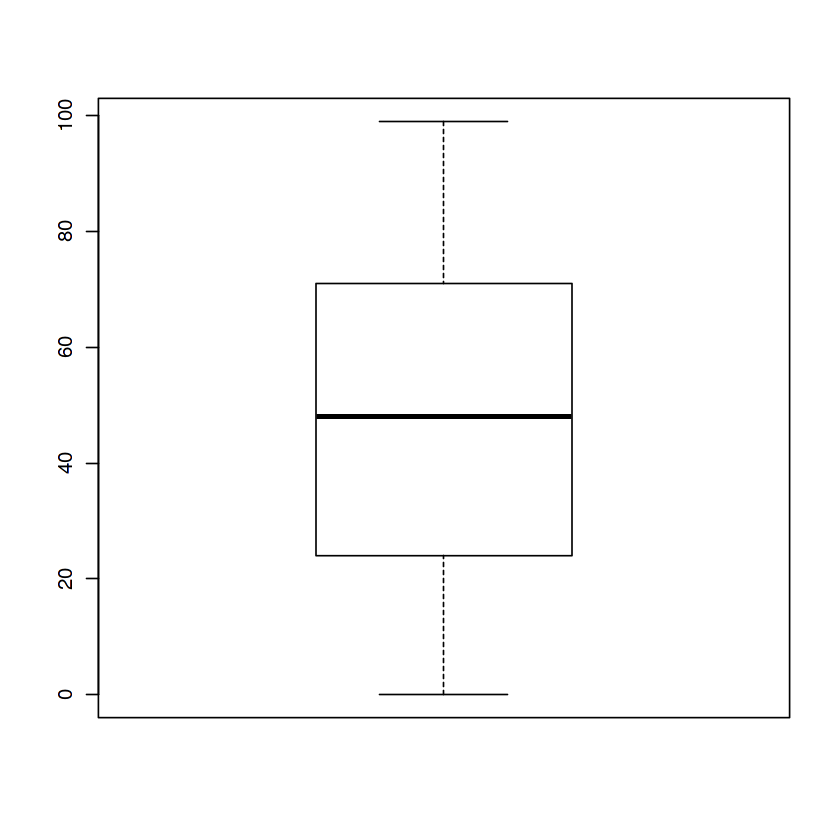

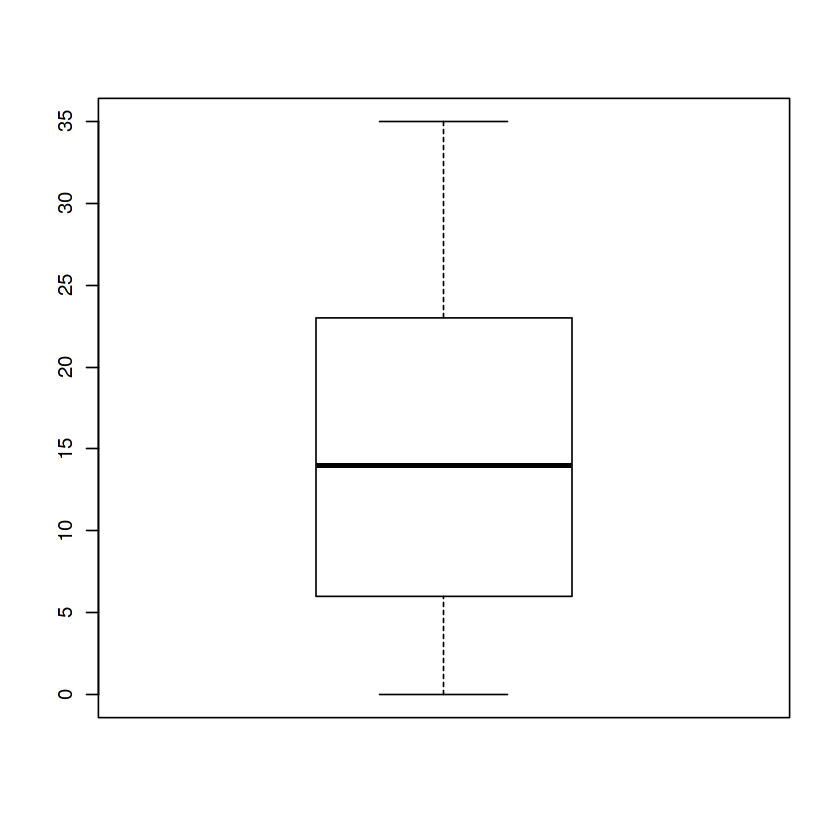

In [16]:
#important observations for continuous features<checking for outliers and other details>
boxplot(data$CLV)#treatment require(upper)
boxplot(data$Monthly.Premium.Auto)#treatment require(upper-lower)
boxplot(data$Total.Claim.Amount)#treatment require(upper)
boxplot(data$Income)
boxplot(data$Months.Since.Last.Claim)
boxplot(data$Policies.Count)
boxplot(data$Open.Complaints)
boxplot(data$Month.Since.Policy.Inception)
boxplot(data$Months.Since.Last.Claim)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  61.00   68.00   83.00   93.22  109.00  298.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  61.00   68.00   80.00   87.59  106.00  170.00 

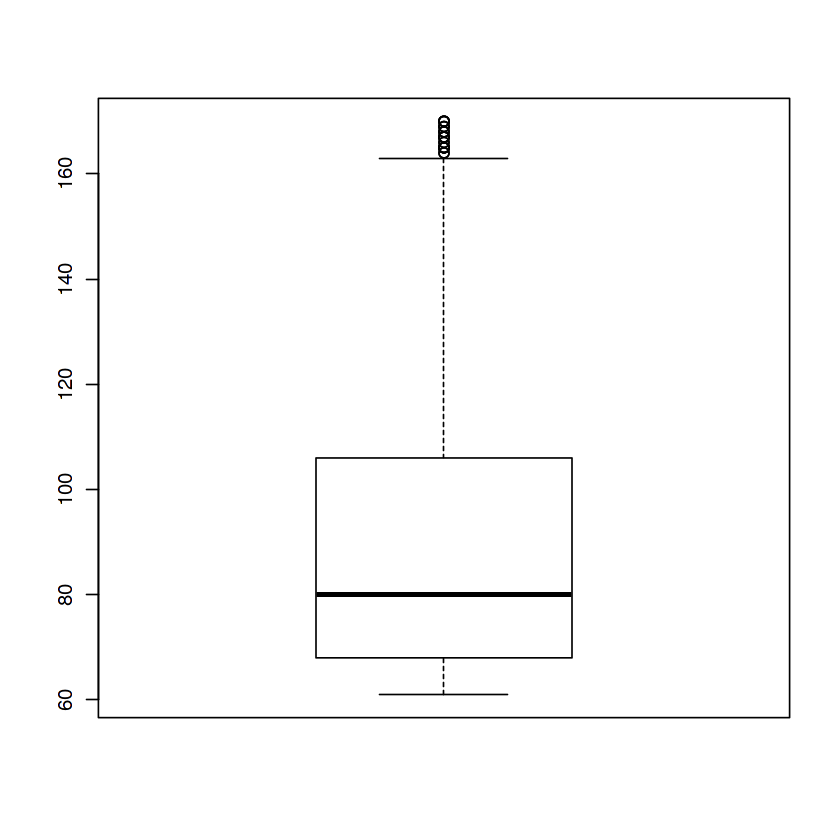

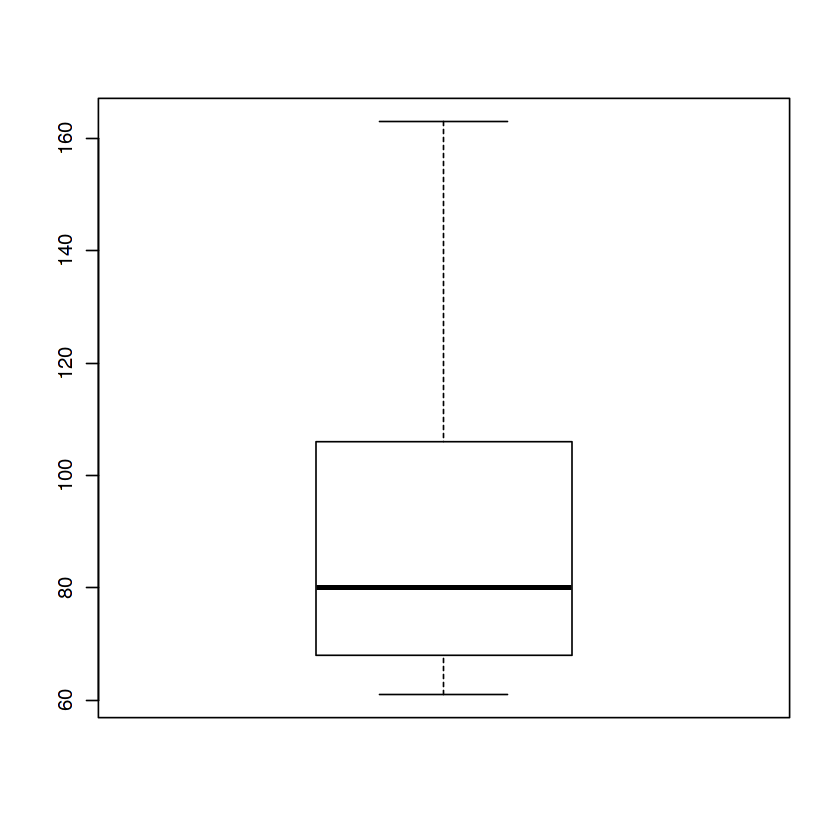

In [10]:
#For linear regression and regularized regression technique
#Removing outliers of Monthly.Premium.Auto
summary(data$Monthly.Premium.Auto)
upper<-109.00+1.5*(109.00-68.00)
data<-subset(data,data$Monthly.Premium.Auto<=upper)
boxplot(data$Monthly.Premium.Auto)

#2nd go
summary(data$Monthly.Premium.Auto)
upper<-106.00+1.5*(106.00-68.00)
data<-subset(data,data$Monthly.Premium.Auto<=upper)
boxplot(data$Monthly.Premium.Auto)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.099  261.930  369.600  401.214  528.000 1554.090 

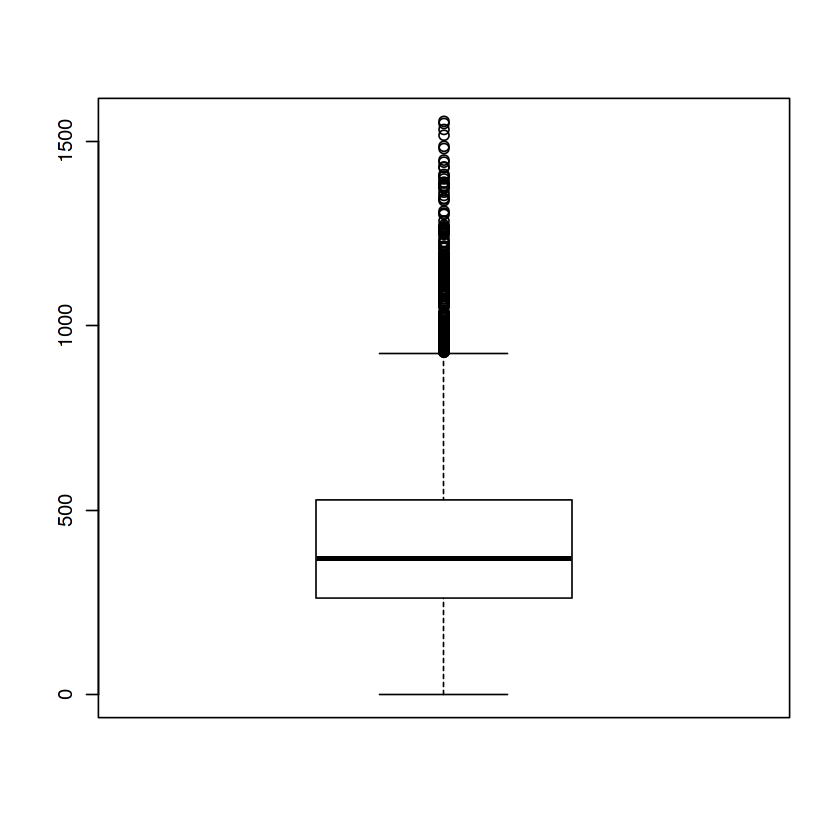

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.099 253.279 355.558 380.534 513.600 925.137 

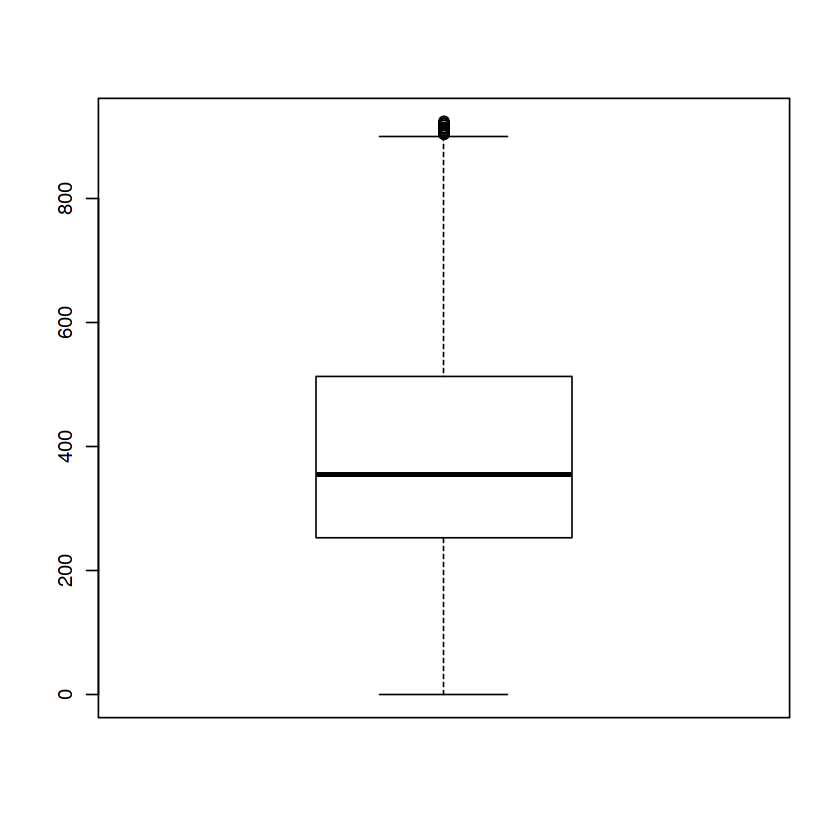

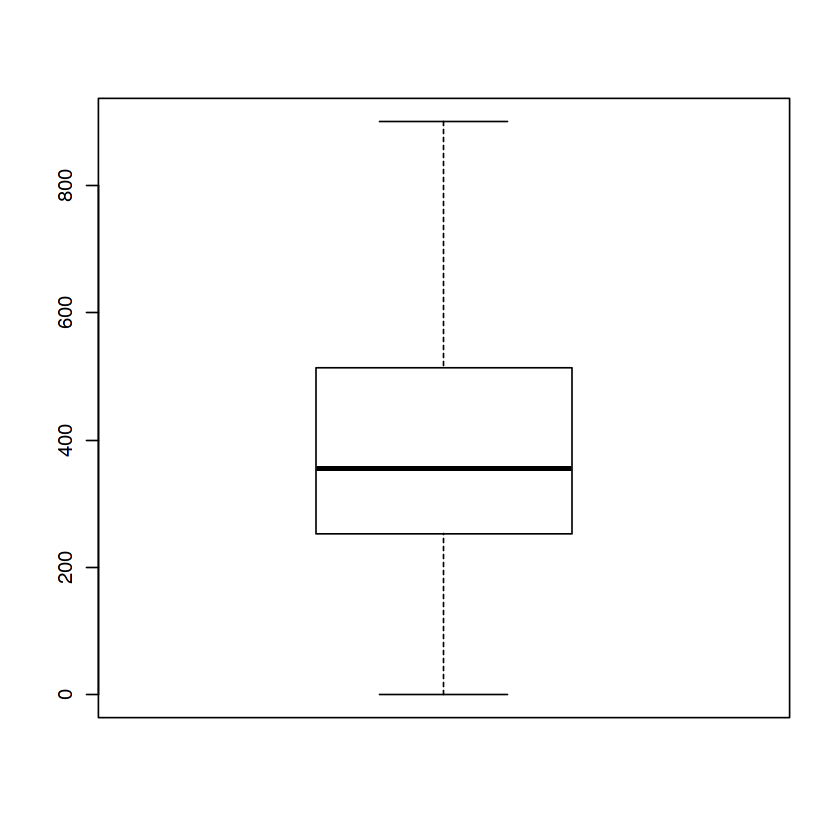

In [11]:
#Removing outliers of Total.Claim.Amount
boxplot(data$Total.Claim.Amount)
summary(data$Total.Claim.Amount)
u_range<-528.000+1.5*(528.000-261.930)
data<-subset(data,data$Total.Claim.Amount<=u_range)
boxplot(data$Total.Claim.Amount)

#2nd go
summary(data$Total.Claim.Amount)
upper<-513.600+1.5*(513.600-253.279)
data<-subset(data,data$Total.Claim.Amount<=upper)
boxplot(data$Total.Claim.Amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1898    3832    5556    7489    8609   57520 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1898    3591    5322    6020    7956   15769 

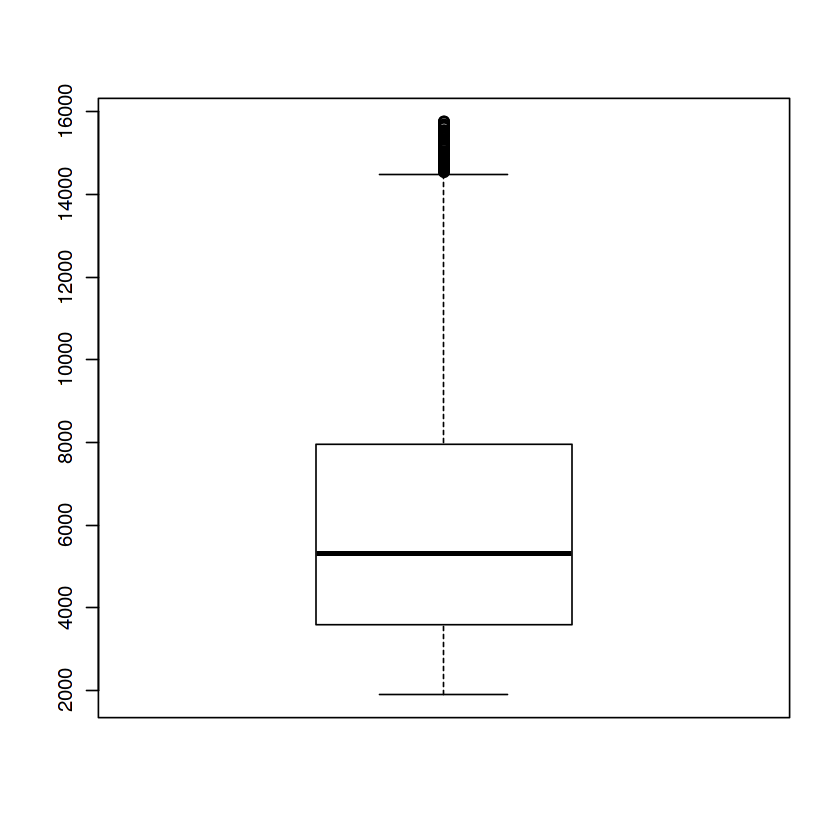

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1898    3568    5287    5898    7839   14476 

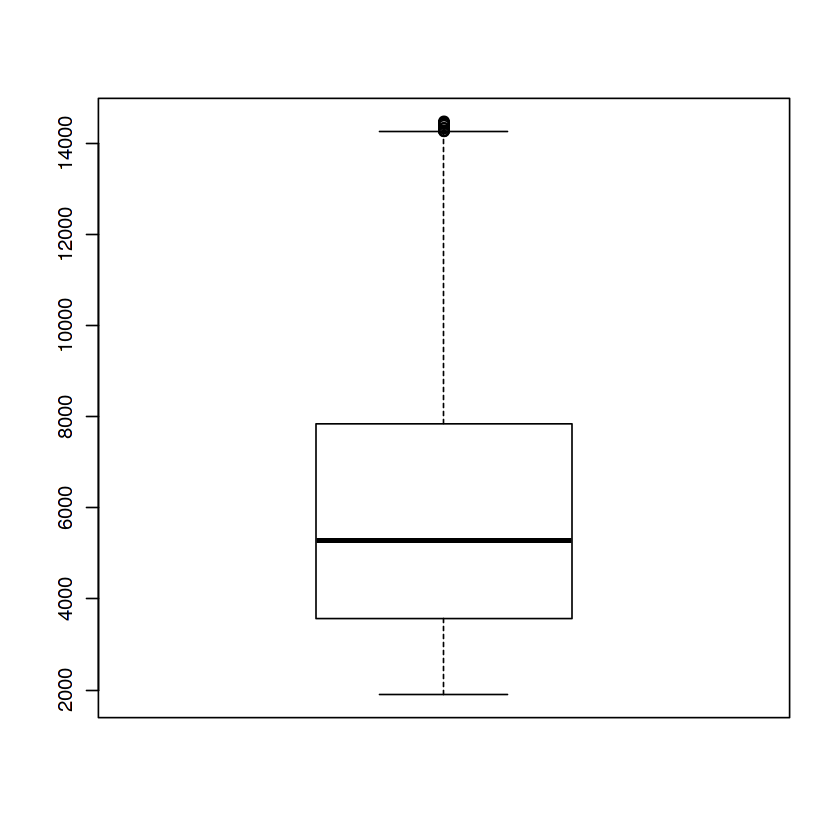

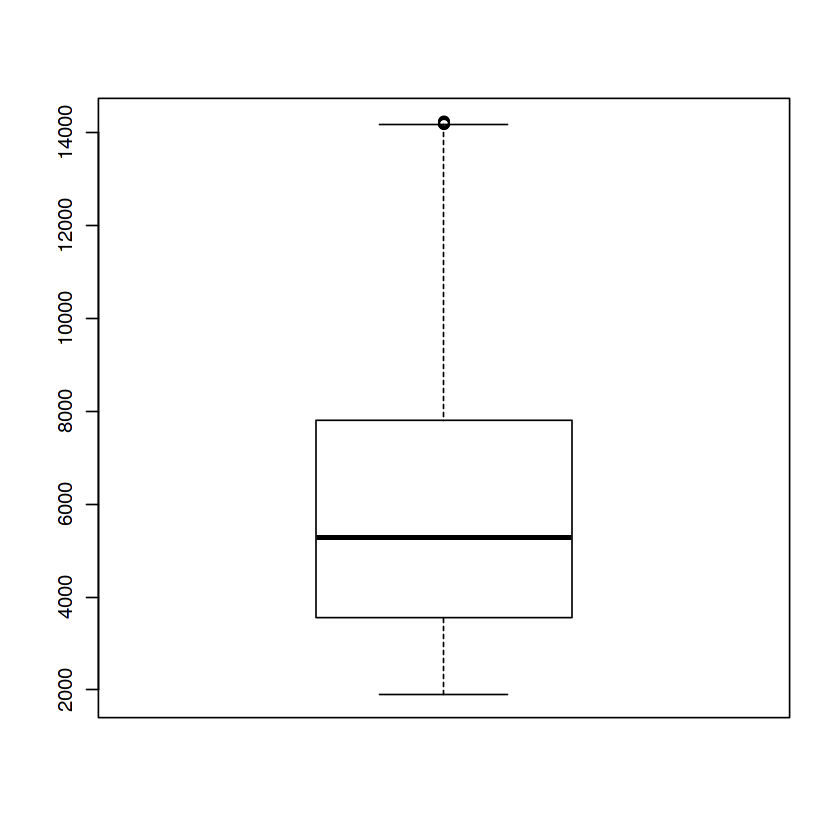

In [12]:
#Removing outliers of CLV
summary(data$CLV)
u_range<-8609+1.5*(8609-3832)
data<-subset(data,data$CLV<=u_range)
boxplot(data$CLV)

#2nd go
summary(data$CLV)
upper<-7956+1.5*(7956-3591)
data<-subset(data,data$CLV<=upper)
boxplot(data$CLV)

#3rd go
summary(data$CLV)
upper<-7839+1.5*(7839-3568)
data<-subset(data,data$CLV<=upper)
boxplot(data$CLV)

In [48]:
#Here, we are keeping another copy of data for regularized regression
#we have already kept a copy<data3/data4> before outlier treatment for RandomForest as it has no effect of having outliers in data
data2<-data

In [18]:
#Creating dummy variables for categorical features and add CLV to new dataset
#finally we came up with 7600 data points and 48 explanatory variables
dmy<-dummyVars(CLV~.,data,fullRank=TRUE)
X<-data.frame(predict(dmy,data))
#Alternative way of train-test split
#smp_size <- floor(0.80 * nrow(X))
#ind <- sample(seq_len(nrow(X)), size = smp_size)
#y<-as.data.frame(data2$CLV)
#X_train <- X[ind, ]
#X_test <- X[-ind, ]
#y_train <- y[ind]
#y_test<-y[-ind]

X$CLV<-data$CLV
#scale data
preprocessParams<-preProcess(X, method = c("center", "scale"))
X <- predict(preprocessParams, X)
#X$CLV<-data2$CLV
#check for dimension and structure
dim(X)
glimpse(X)

[1] 7600   49

Observations: 7,600
Variables: 49
$ StateCalifornia               <dbl> -0.7225388, -0.7225388, 1.3838267, -0.7…
$ StateNevada                   <dbl> -0.3242209, 3.0839107, -0.3242209, -0.3…
$ StateOregon                   <dbl> -0.6304921, -0.6304921, -0.6304921, -0.…
$ StateWashington               <dbl> 3.2264596, -0.3098965, -0.3098965, 3.22…
$ ResponseYes                   <dbl> -0.4148413, -0.4148413, -0.4148413, -0.…
$ CoverageExtended              <dbl> -0.6386511, -0.6386511, -0.6386511, -0.…
$ CoveragePremium               <dbl> -0.2748877, 3.6373711, -0.2748877, -0.2…
$ EducationCollege              <dbl> -0.6529704, -0.6529704, -0.6529704, -0.…
$ EducationDoctor               <dbl> -0.2034103, -0.2034103, -0.2034103, -0.…
$ EducationHigh.School.or.Below <dbl> -0.623772, -0.623772, -0.623772, -0.623…
$ EducationMaster               <dbl> -0.2959175, -0.2959175, -0.2959175, -0.…
$ EmploymentStatusEmployed      <dbl> 0.7527368, 0.7527368, -1.3283108, 0.752…
$ EmploymentStatus

In [19]:
#Create data partition using 80-20 rule
set.seed(999)
index<-createDataPartition(X$CLV, p=0.80, list=FALSE)
train<-X[index,]
test<-X[-index,]

In [20]:
#Creating a custom function to obtain RMSE
calc_rmse<-function(actual,predicted){
    sqrt(mean(actual-predicted)^2)
}

Warning message in predict.lm(clv_lm, test):
“prediction from a rank-deficient fit may be misleading”


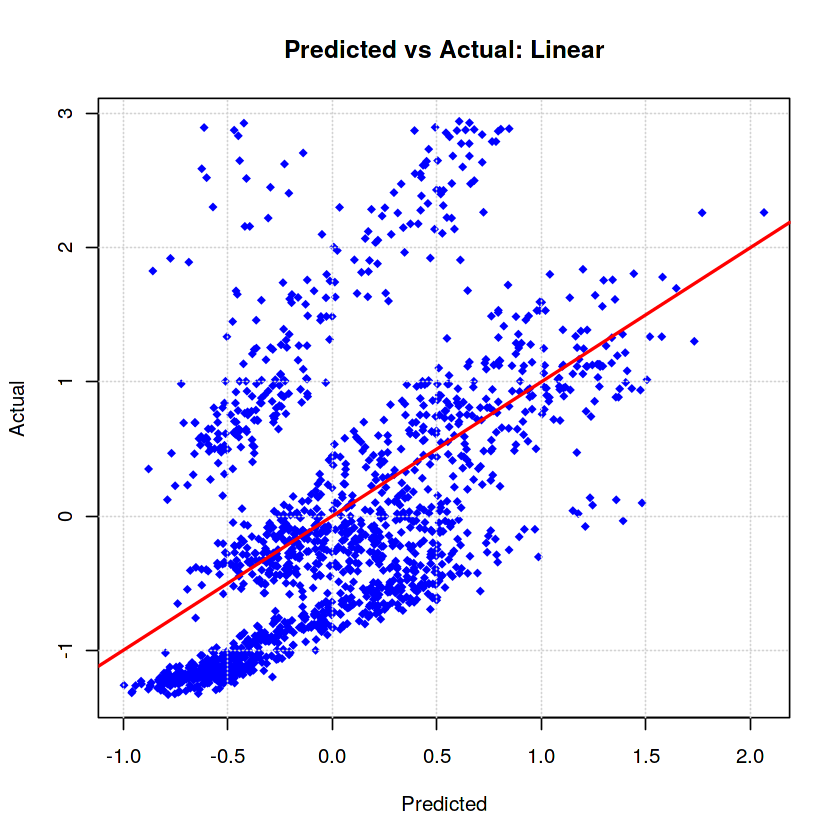

In [21]:
#Applying linear regression using lm()
set.seed(999)
clv_lm<-lm(CLV~.,train)#nzv,range,YeoJohnson
clv_lm_tst_pred<- predict(clv_lm, test)
plot(clv_lm_tst_pred, test$CLV,
    xlab= "Predicted", ylab= "Actual",
    main="Predicted vs Actual: Linear", col="blue", pch=18)
grid()
abline(0, 1, col = "red", lwd = 2)

In [22]:
#Here we can see in 'Fitted vs Residual' plot, the affect of non-linear distribution in variables
#summary(clv_lm)
#(lm_tst_rmse2 = calc_rmse(clv_lm_tst_pred2, test$CLV))#14.4812044544613
#summary(clv_lm2)$r.squared
postResample(clv_lm_tst_pred, test$CLV)
#We are getting low R-squared and F-stat value with high MAE, which is not desired. Above all ver undesired fitted vs residual plot above

RMSE  Rsquared       MAE 
0.8431244 0.2923818 0.6441659

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  61.00   68.00   83.00   93.22  109.00  298.00 

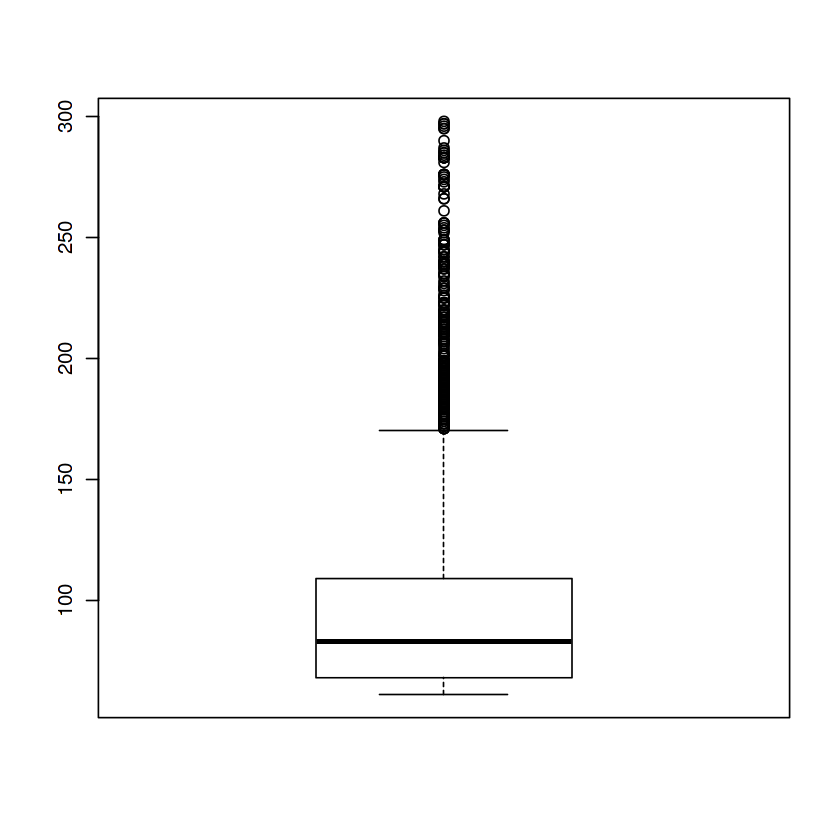

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  61.00   68.00   80.00   87.59  106.00  170.00 

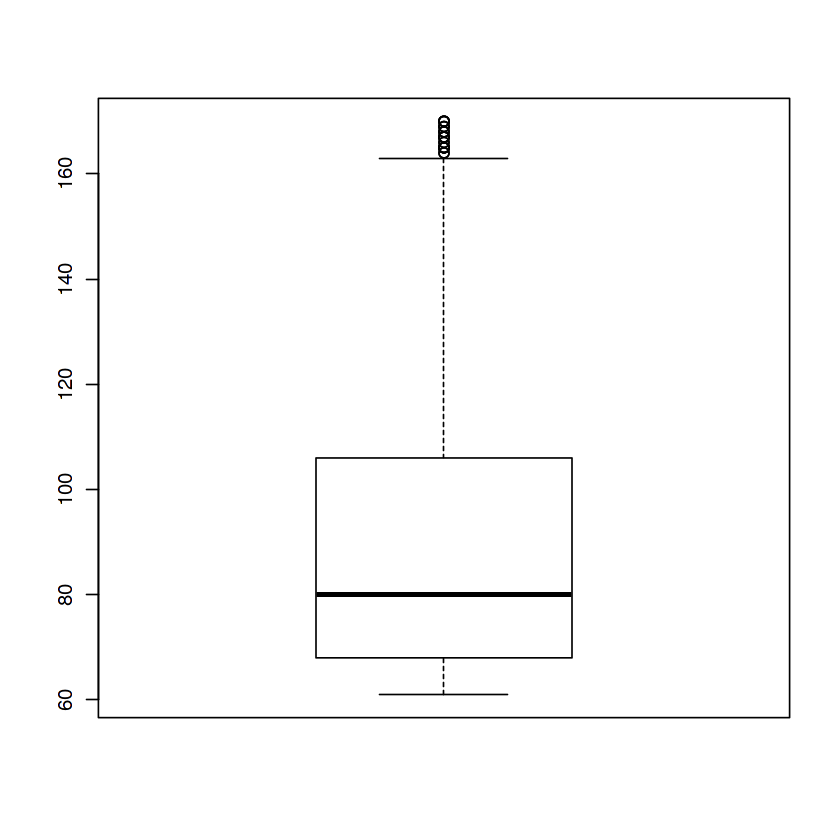

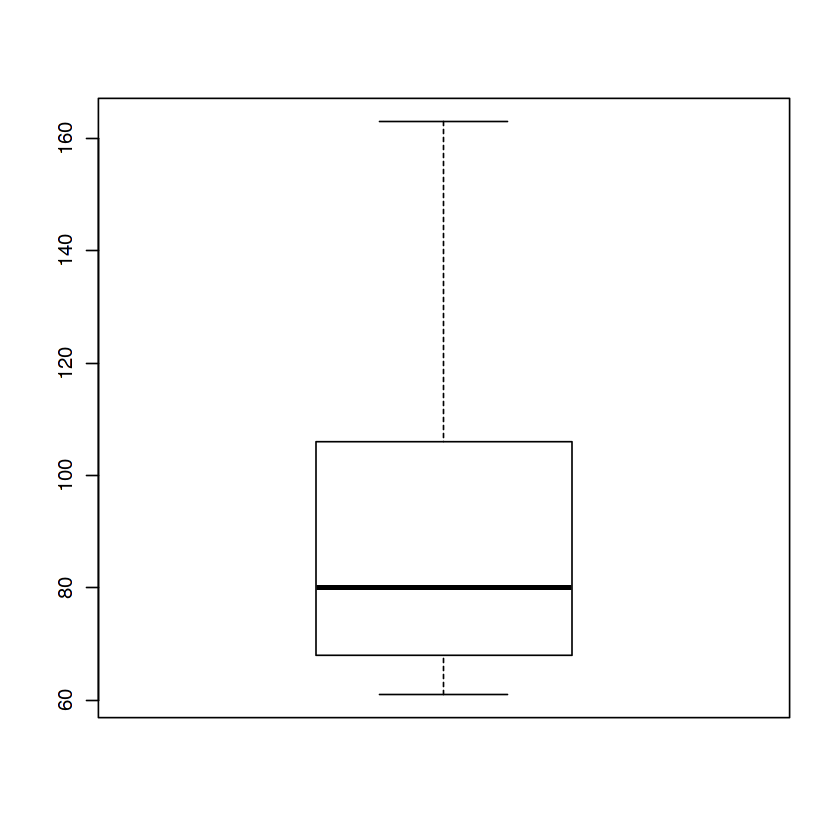

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.099  261.930  369.600  401.214  528.000 1554.090 

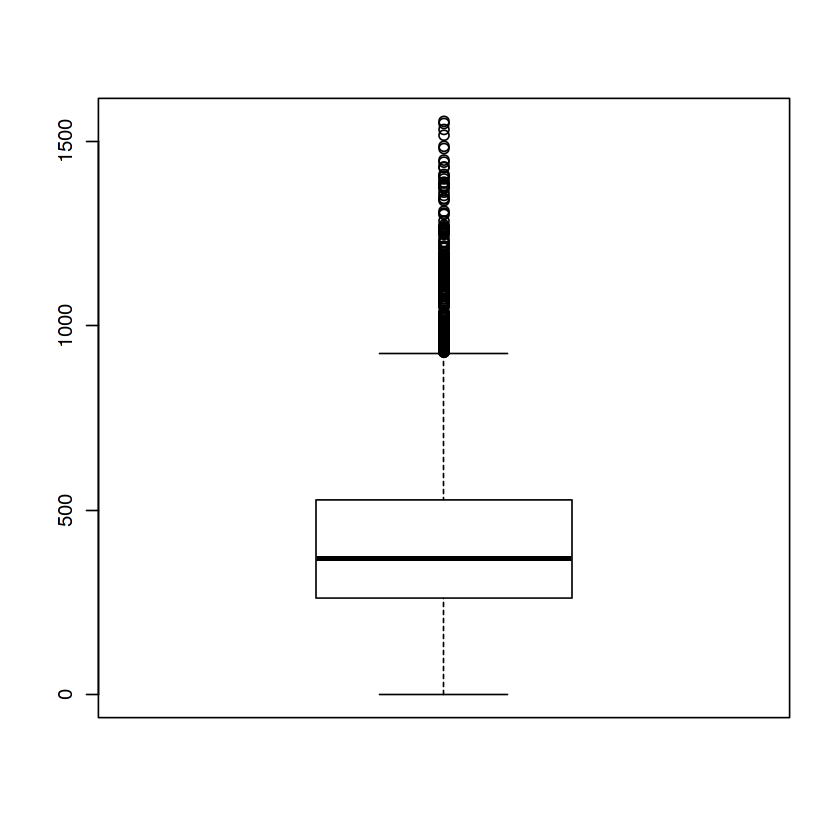

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.099 253.279 355.558 380.534 513.600 925.137 

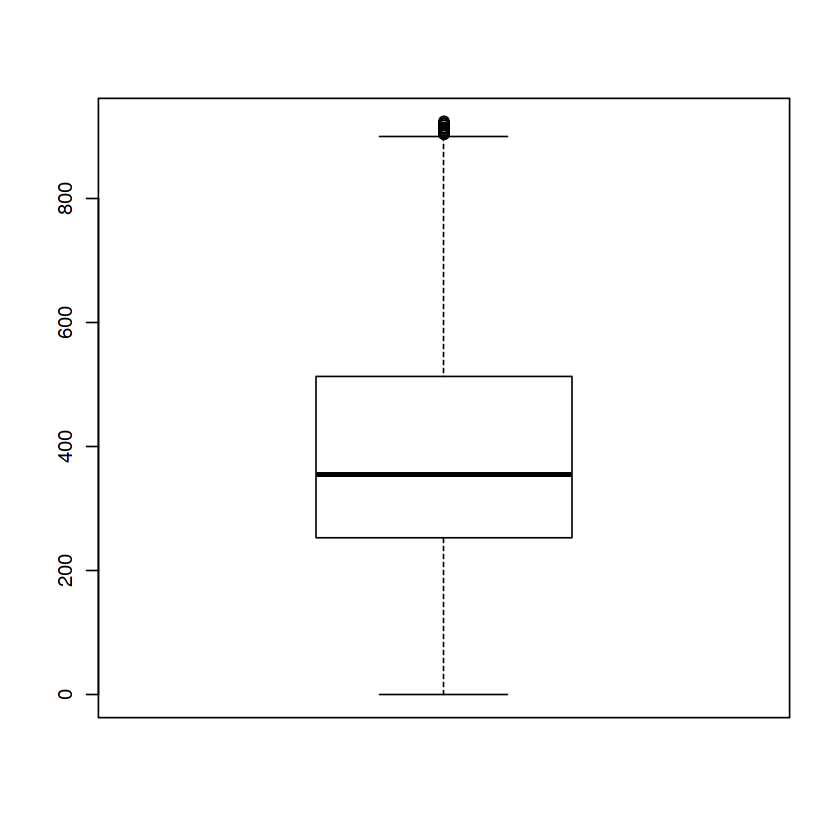

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1898    3832    5556    7489    8609   57520 

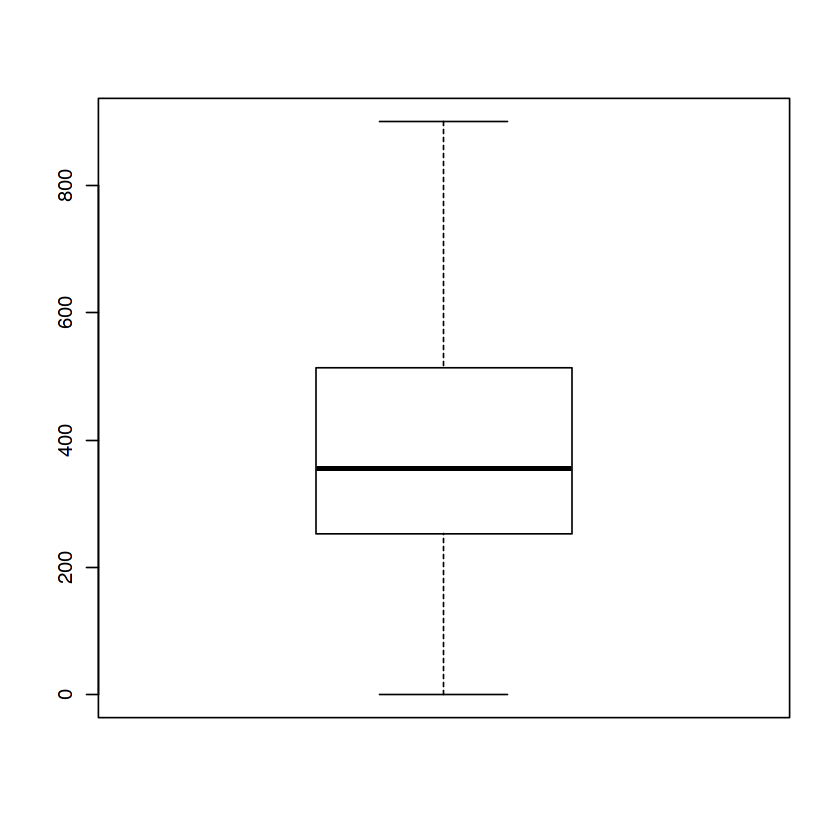

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1898    3832    5556    7489    8609   57520 

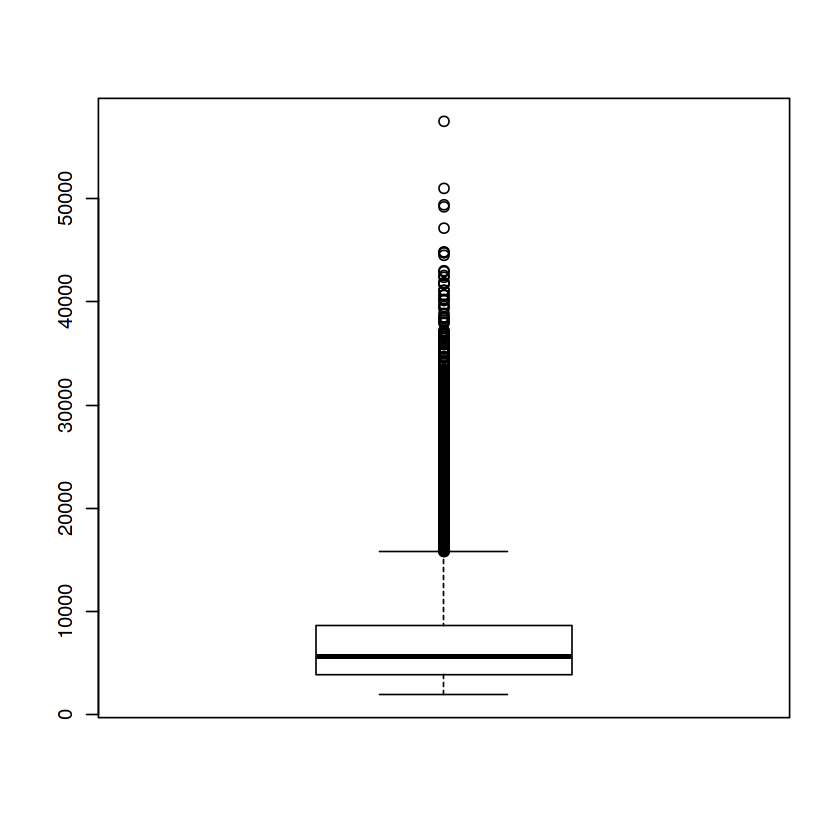

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1898    3568    5287    5898    7839   14476 

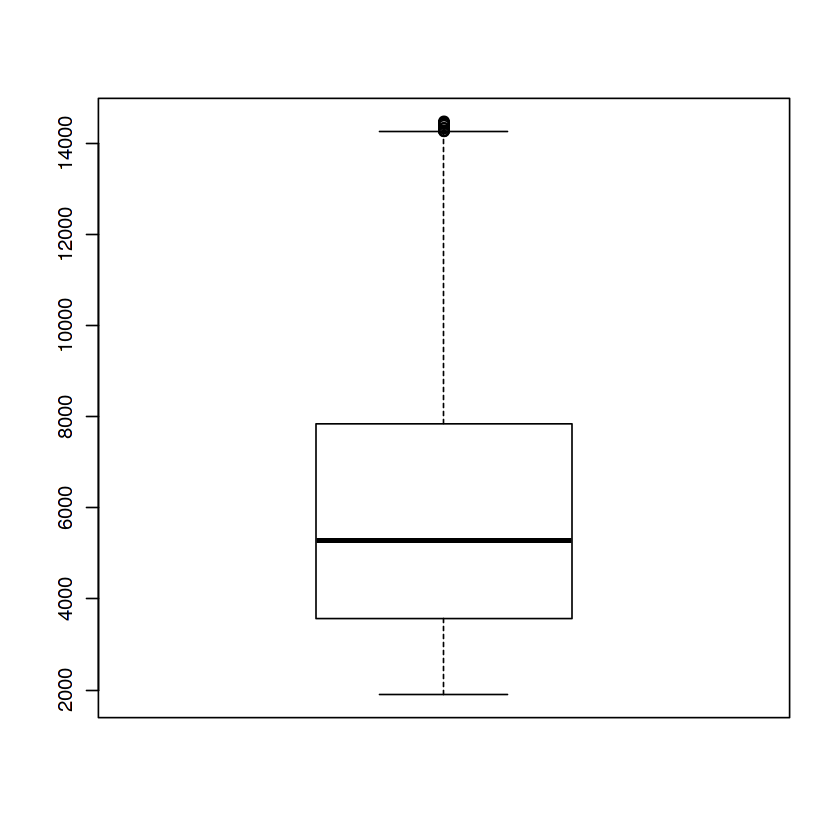

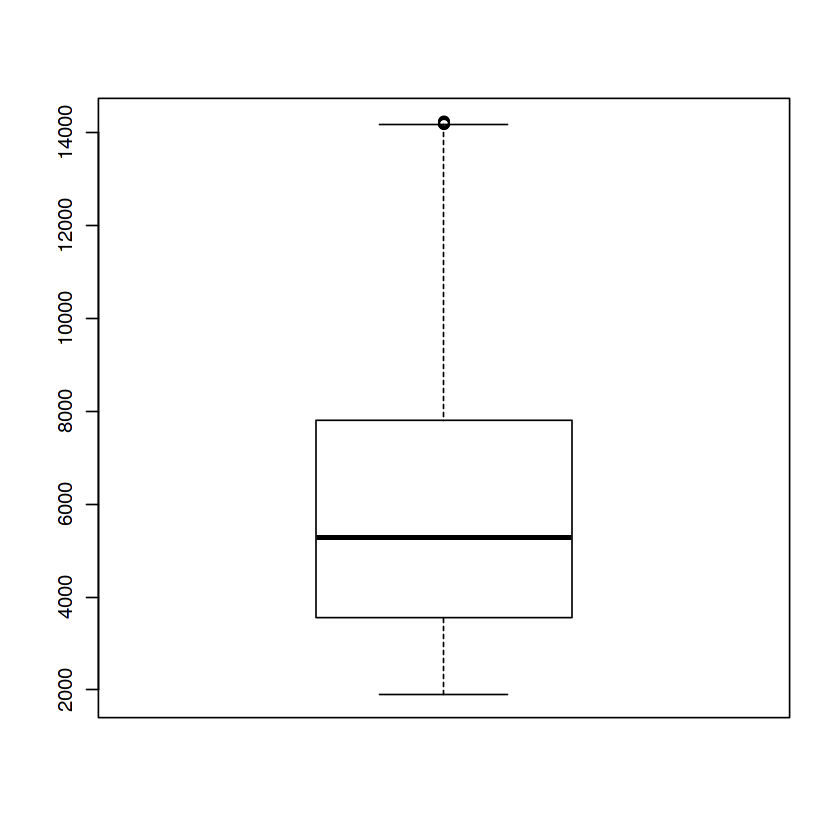

In [32]:
#Removing outliers of Monthly.Premium.Auto
boxplot(data2$Monthly.Premium.Auto)
summary(data2$Monthly.Premium.Auto)
upper<-109.00+1.5*(109.00-68.00)
data2<-subset(data2,data2$Monthly.Premium.Auto<=upper)
boxplot(data2$Monthly.Premium.Auto)

#2nd go
summary(data2$Monthly.Premium.Auto)
upper<-106.00+1.5*(106.00-68.00)
data2<-subset(data2,data2$Monthly.Premium.Auto<=upper)
boxplot(data2$Monthly.Premium.Auto)

#Removing outliers of Total.Claim.Amount
boxplot(data2$Total.Claim.Amount)
summary(data2$Total.Claim.Amount)
u_range<-528.000+1.5*(528.000-261.930)
data2<-subset(data2,data2$Total.Claim.Amount<=u_range)
boxplot(data2$Total.Claim.Amount)

#2nd go
summary(data2$Total.Claim.Amount)
upper<-513.600+1.5*(513.600-253.279)
data2<-subset(data2,data2$Total.Claim.Amount<=upper)
boxplot(data2$Total.Claim.Amount)

#Removing outliers of CLV
summary(data2$CLV)
u_range<-8609+1.5*(8609-3832)
data<-subset(data2,data2$CLV<=u_range)
boxplot(data2$CLV)

#2nd go
summary(data2$CLV)
upper<-7956+1.5*(7956-3591)
data2<-subset(data2,data2$CLV<=upper)
boxplot(data2$CLV)

#3rd go
summary(data2$CLV)
upper<-7839+1.5*(7839-3568)
data2<-subset(data2,data2$CLV<=upper)
boxplot(data2$CLV)

In [52]:
#Here we will be working with data2
#creating dummyVariables<an alternative to factor conversion of categorical features> 
dmy<-dummyVars(CLV~.,data2,fullRank=TRUE)
X<-data.frame(predict(dmy,data2))
X$CLV<-data2$CLV
target<-X %>% select(CLV) %>% scale(center=TRUE,scale=TRUE) %>% as.matrix()
features<-X %>% select(-CLV) %>% scale(center=TRUE,scale=TRUE) %>% as.matrix()

[1] 0.04208815

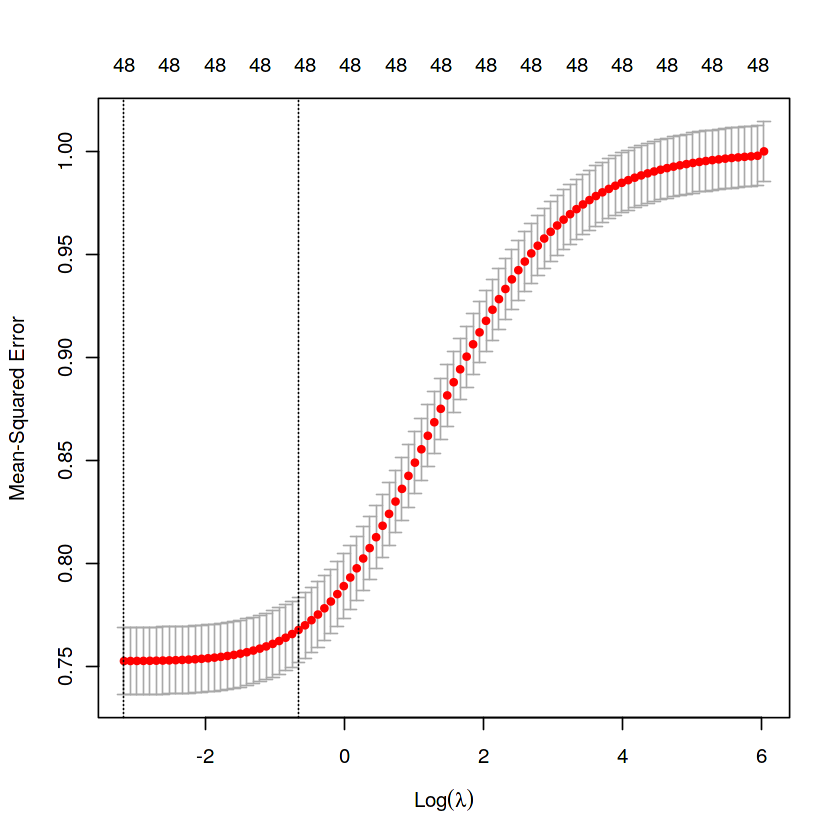

In [53]:
library(glmnet)
#Rige implementation
lambdas<-10^seq(3,-2, by=-0.1)
fit.cv<-cv.glmnet(features, target, alpha=0, lamda=lamdas, standardize=TRUE, family="gaussian")
plot(fit.cv)
optimum_lambda<-fit.cv$lambda.min
optimum_lambda#0.0420881534738302

In [54]:
fit.ridge<-glmnet(features, target, alpha=0, lamda=optimum_lambda, length.out=100)
pred<-predict(fit.ridge, s=optimum_lambda, newx=features)
postResample(pred,target)

RMSE  Rsquared       MAE 
0.8622999 0.2565540 0.6507722

[1] 0.005310923

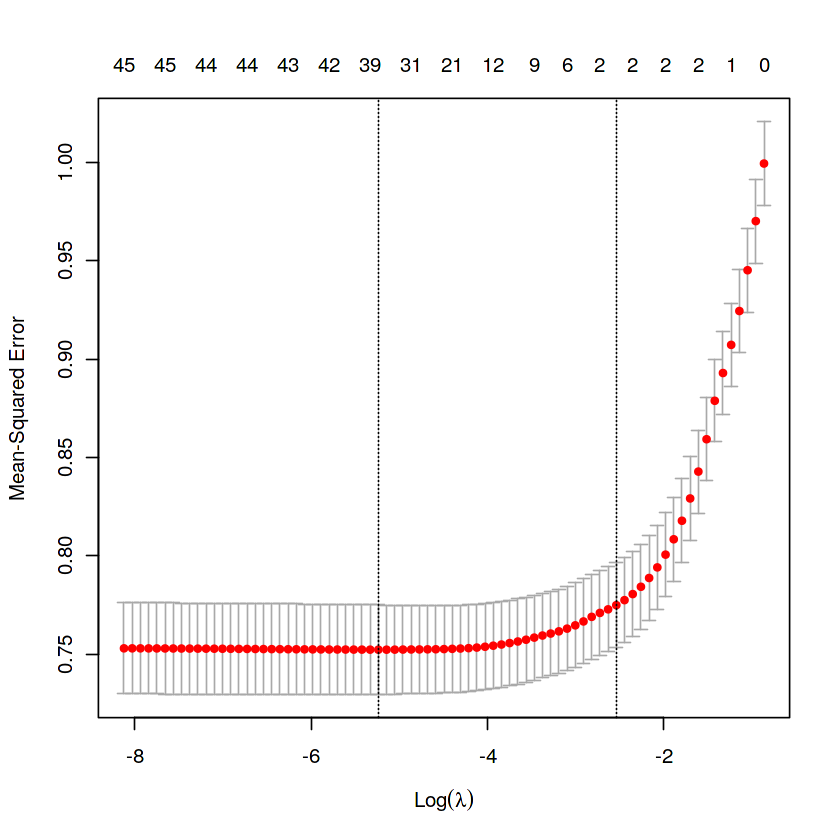

In [56]:
#Lasso
lambdas<-10^seq(-2,3,length.out=100)
fit.cv<-cv.glmnet(features, target, alpha=1, lamda=lamdas, standardize=TRUE, family="gaussian")
plot(fit.cv)
optimum_lambda<-fit.cv$lambda.min
optimum_lambda#0.00531092259172076

In [57]:
fit.lasso<-glmnet(features, target, alpha=1, lamda=lamdas, standardize = TRUE, nfolds=10)
pred<-predict(fit.lasso, s=optimum_lambda, newx=features)
postResample(pred,target)

RMSE  Rsquared       MAE 
0.8627455 0.2557166 0.6501776

In [67]:
#Elasticnet
target<-X %>% select(CLV) %>% scale(center=TRUE,scale=TRUE) %>% as.matrix()
features<-X %>% select(-CLV) %>% scale(center=TRUE,scale=TRUE) %>% as.matrix()
library(caret)
set.seed(999)
control<-trainControl(method="repeatedcv", number=10, repeats=3, search="random", verboseIter=TRUE)
fit.elnet<-train(CLV~.,data= cbind(target,features), method="glmnet", trControl=control, tuneLength=20)
fit.elnet$bestTune
preds<-predict(fit.elnet,target)
postResample(preds,target)

+ Fold01.Rep1: alpha=0.09467, lambda=0.142869 
- Fold01.Rep1: alpha=0.09467, lambda=0.142869 
+ Fold01.Rep1: alpha=0.85263, lambda=0.021302 
- Fold01.Rep1: alpha=0.85263, lambda=0.021302 
+ Fold01.Rep1: alpha=0.78675, lambda=1.668919 
- Fold01.Rep1: alpha=0.78675, lambda=1.668919 
+ Fold01.Rep1: alpha=0.11934, lambda=1.573179 
- Fold01.Rep1: alpha=0.11934, lambda=1.573179 
+ Fold01.Rep1: alpha=0.60645, lambda=0.163845 
- Fold01.Rep1: alpha=0.60645, lambda=0.163845 
+ Fold01.Rep1: alpha=0.08096, lambda=0.259695 
- Fold01.Rep1: alpha=0.08096, lambda=0.259695 
+ Fold01.Rep1: alpha=0.39077, lambda=1.742847 
- Fold01.Rep1: alpha=0.39077, lambda=1.742847 
+ Fold01.Rep1: alpha=0.61947, lambda=0.060995 
- Fold01.Rep1: alpha=0.61947, lambda=0.060995 
+ Fold01.Rep1: alpha=0.28569, lambda=0.002129 
- Fold01.Rep1: alpha=0.28569, lambda=0.002129 
+ Fold01.Rep1: alpha=0.55112, lambda=0.007449 
- Fold01.Rep1: alpha=0.55112, lambda=0.007449 
+ Fold01.Rep1: alpha=0.03015, lambda=0.112979 
- Fold01.Rep1

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Aggregating results
Selecting tuning parameters
Fitting alpha = 0.551, lambda = 0.00745 on full training set


,alpha,lambda
,<dbl>,<dbl>
11,0.5511227,0.007448725


ERROR: Error in eval(predvars, data, env): object 'StateCalifornia' not found


In [69]:
#preprocessParams<-preProcess(data2, method = c("center", "scale"))
#data2 <- predict(preprocessParams, data2)

dmy<-dummyVars(CLV~.,data2,fullRank=TRUE)
X<-data.frame(predict(dmy,data2))

X$CLV<-data2$CLV
set.seed(999)
index<-createDataPartition(X$CLV, p=0.75, list=FALSE)
train<-X[index,]
test<-X[-index,]

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘preprocess’ will be disregarded”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘preprocess’ will be disregarded”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘preprocess’ will be disregarded”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘preprocess’ will be disregarded”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message:
“In lm.fit(x, y

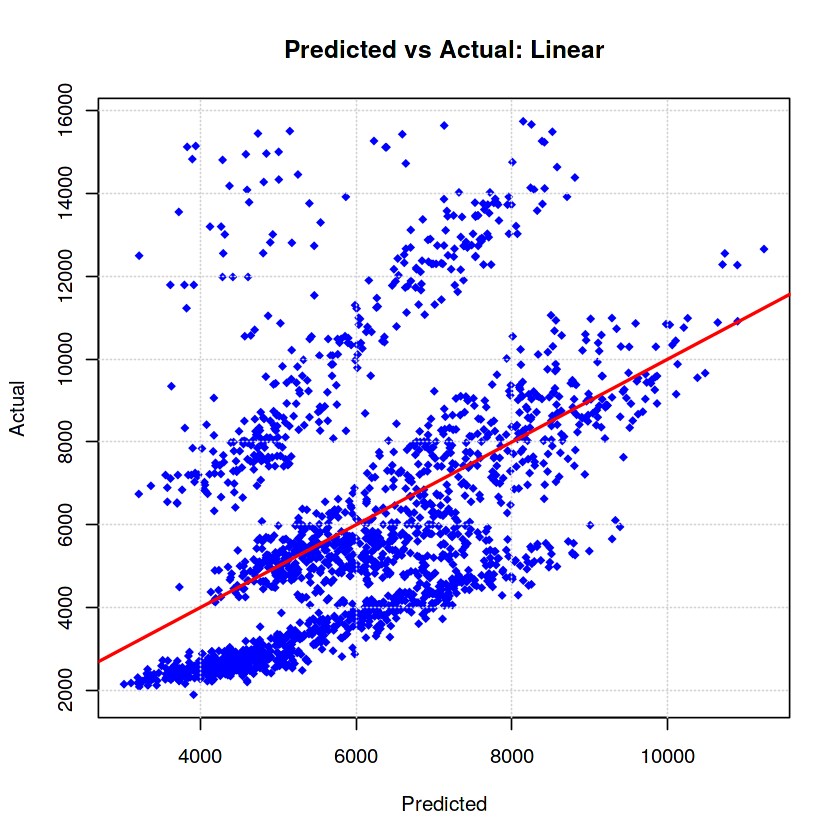

In [70]:
#Using caret's train() function
set.seed(999)
control<-trainControl(method="repeatedcv", number=10, repeats=3)
clv_lm<-train(CLV~.,train, method="lm", trControl=control, preprocess=c("center","scale","BoxCox"))#nzv,range,YeoJohnson
clv_lm_tst_pred<- predict(clv_lm, test)
plot(clv_lm_tst_pred, test$CLV,
    xlab= "Predicted", ylab= "Actual",
    main="Predicted vs Actual: Linear", col="blue", pch=18)
grid()
abline(0, 1, col = "red", lwd = 2)

In [71]:
summary(clv_lm)
#(lm_tst_rmse2 = calc_rmse(clv_lm_tst_pred2, test$CLV))#14.4812044544613
#summary(clv_lm2)$r.squared
postResample(clv_lm_tst_pred, test$CLV)


Call:
lm(formula = .outcome ~ ., data = dat, preprocess = ..1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4100.0 -1850.2  -687.2   732.4 11336.2 

Coefficients: (2 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    8.152e+02  5.437e+02   1.499   0.1338    
StateCalifornia                1.330e+02  9.872e+01   1.347   0.1779    
StateNevada                    2.200e+01  1.367e+02   0.161   0.8722    
StateOregon                    1.452e+02  1.016e+02   1.428   0.1533    
StateWashington               -1.319e+02  1.405e+02  -0.939   0.3478    
ResponseYes                   -3.885e+01  1.068e+02  -0.364   0.7160    
CoverageExtended              -6.523e+01  1.518e+02  -0.430   0.6673    
CoveragePremium                1.224e+02  3.101e+02   0.395   0.6932    
EducationCollege               9.949e+01  8.889e+01   1.119   0.2631    
EducationDoctor               -1.076e+02  1.793e+02  -0.

RMSE    Rsquared         MAE 
2654.847748    0.249242 1984.226335

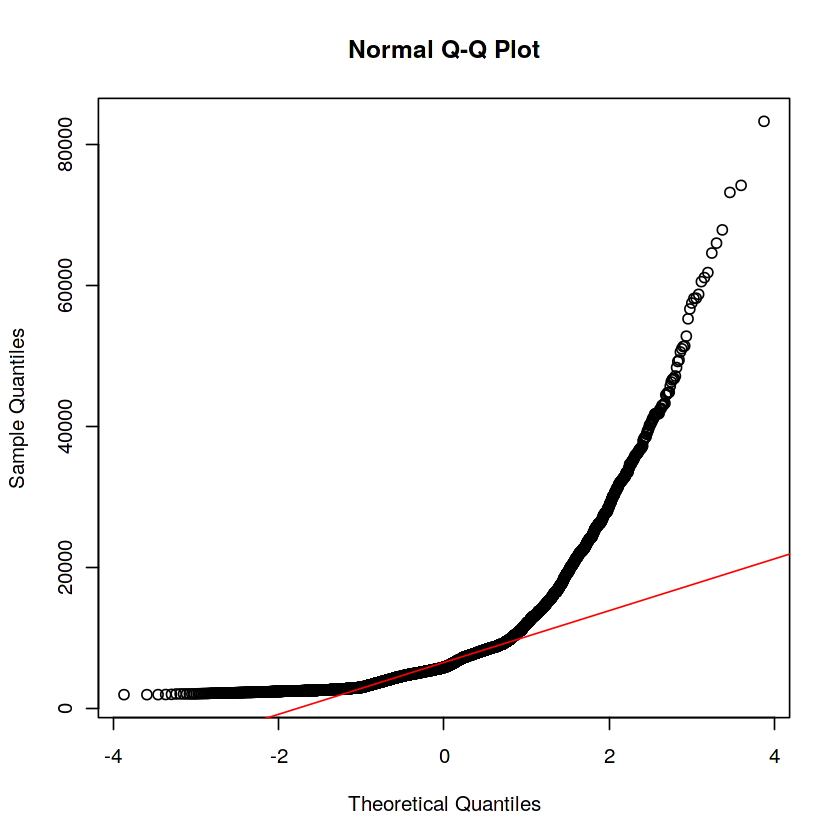

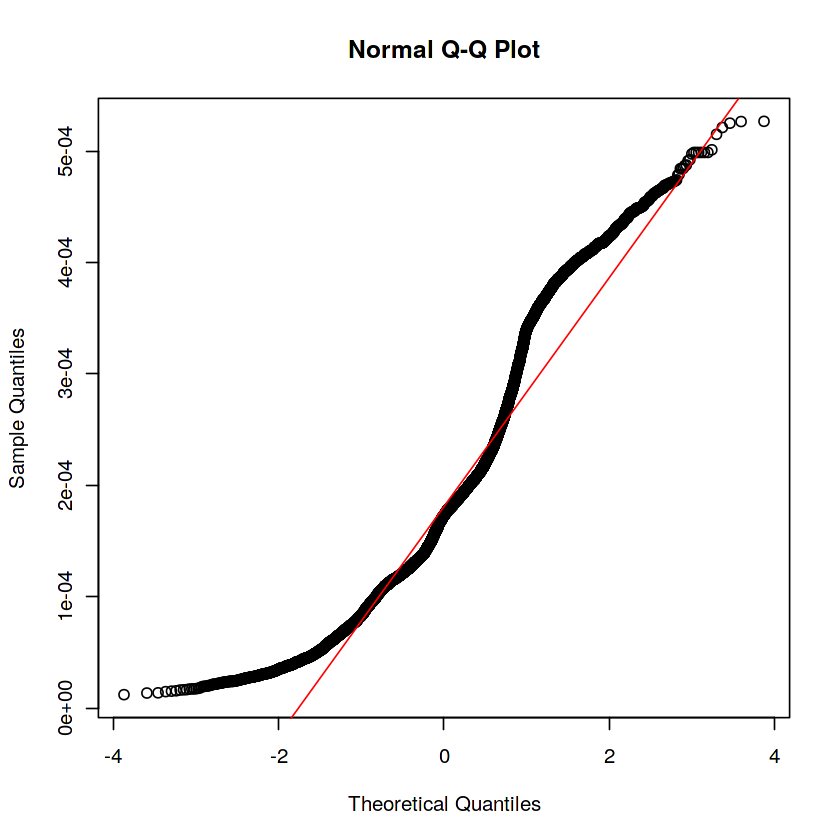

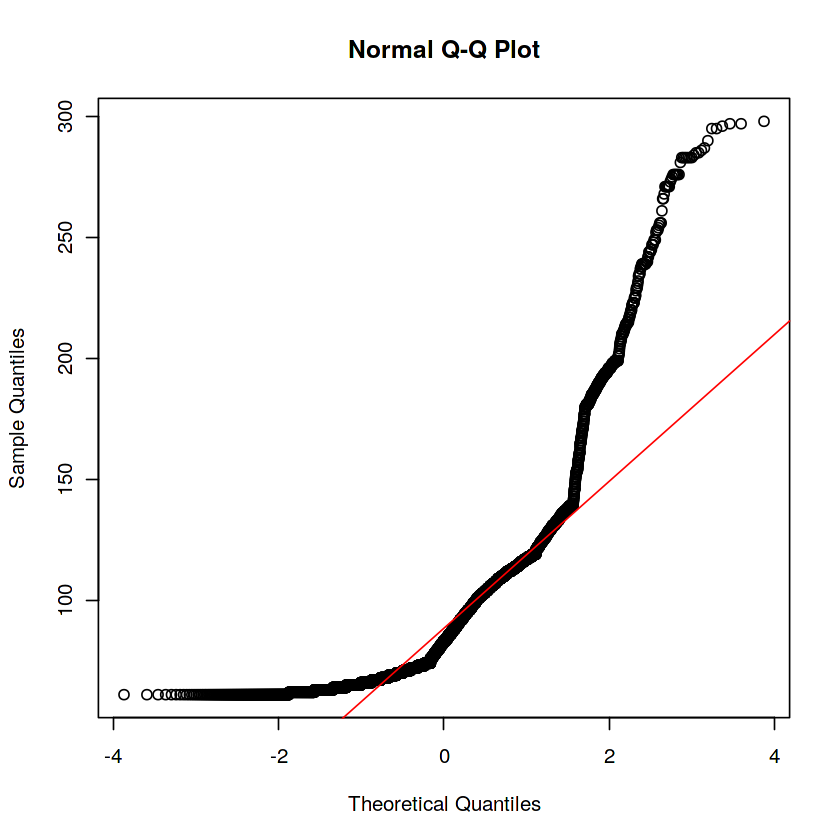

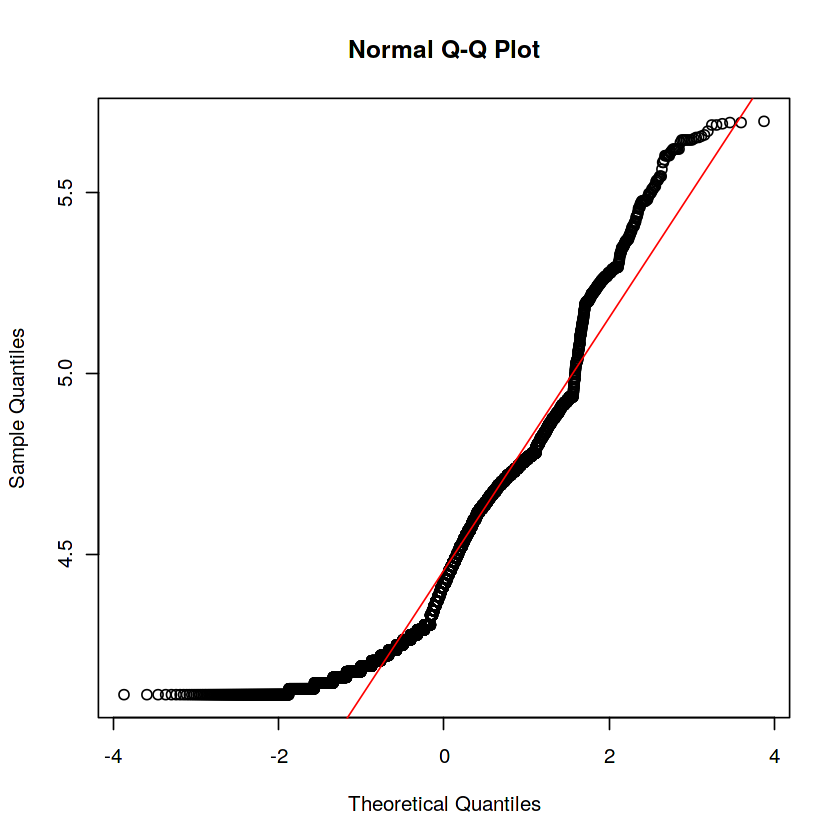

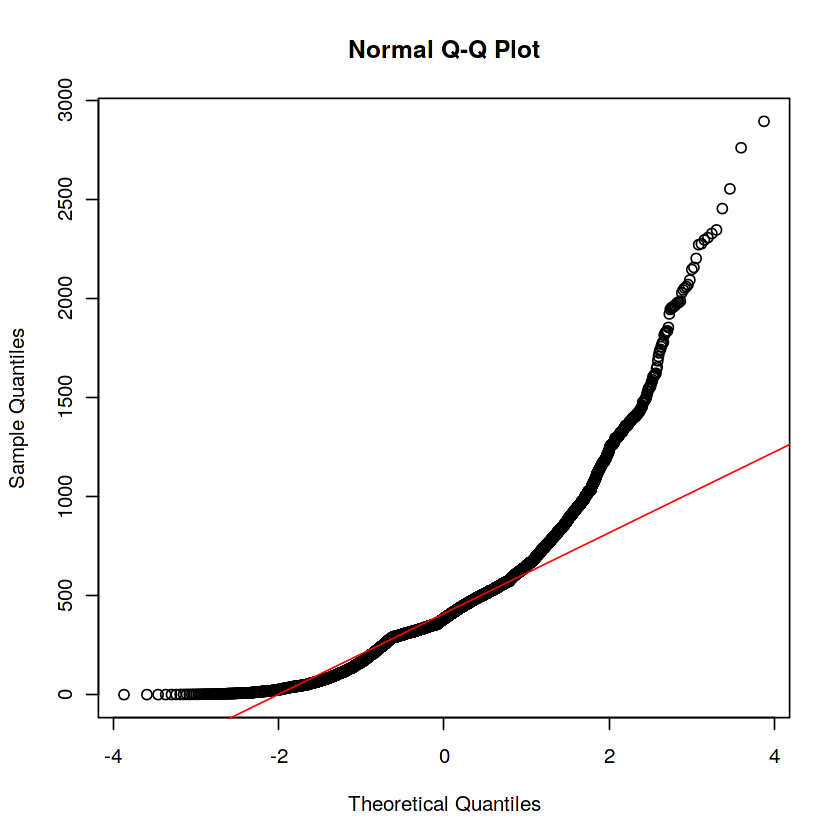

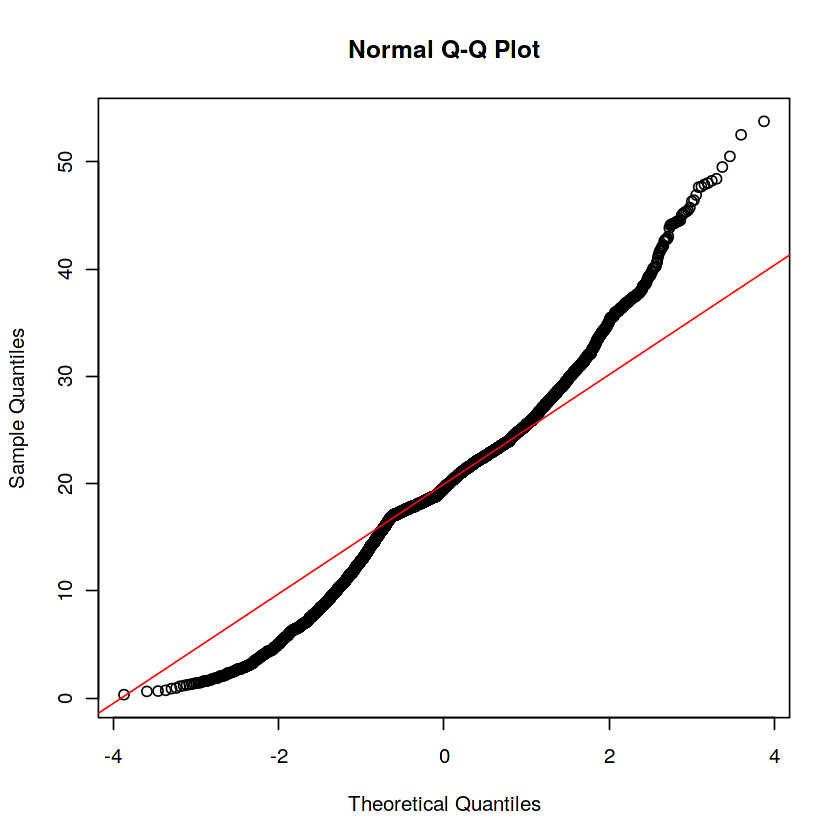

In [74]:
#data preparation for random forest
#Normality check
data3<-data3[,-c(1,7)]
qqnorm(data3$CLV)
qqline(data3$CLV, col="red")
data3['rec_clv']=1/data3$CLV
qqnorm(data3$rec_clv)
qqline(data3$rec_clv, col="red")

qqnorm(data3$Monthly.Premium.Auto)
qqline(data3$Monthly.Premium.Auto, col="red")
data3["log_Monthly.Premium.Auto"]=log(data3$Monthly.Premium.Auto)
qqnorm(data3$log_Monthly.Premium.Auto)
qqline(data3$log_Monthly.Premium.Auto, col="red")

qqnorm(data3$Total.Claim.Amount)
qqline(data3$Total.Claim.Amount, col="red")
data3['root_Total.Claim.Amount']=sqrt(data3$Total.Claim.Amount)
qqnorm(data3$root_Total.Claim.Amount)
qqline(data3$root_Total.Claim.Amount, col="red")

In [76]:
#removing non-transformed variables
data3<-data3[,-c(2,11,20)]
#creating dummy variables
dmy<-dummyVars(rec_clv~.,data3,fullRank=TRUE)
X<-data.frame(predict(dmy,data3))
#Standardization
set.seed(99)
preprocessParams<-preProcess(X, method = c("center", "scale"))
X <- predict(preprocessParams, X)

X$CLV<-data3$rec_clv

set.seed(999)
index<-createDataPartition(X$CLV, p=0.75, list=FALSE)
train<-X[index,]
test<-X[-index,]

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = CLV ~ ., data = train, mtry = 17, importance = TRUE,      ntrees = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 17

          Mean of squared residuals: 2.220841e-10
                    % Var explained: 98.17

                Length Class  Mode     
call               6   -none- call     
type               1   -none- character
predicted       6851   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       6851   -none- numeric  
importance       100   -none- numeric  
importanceSD      50   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               6851   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

RMSE     Rsquared          MAE 
1.446926e-05 9.827815e-01 8.254302e-06

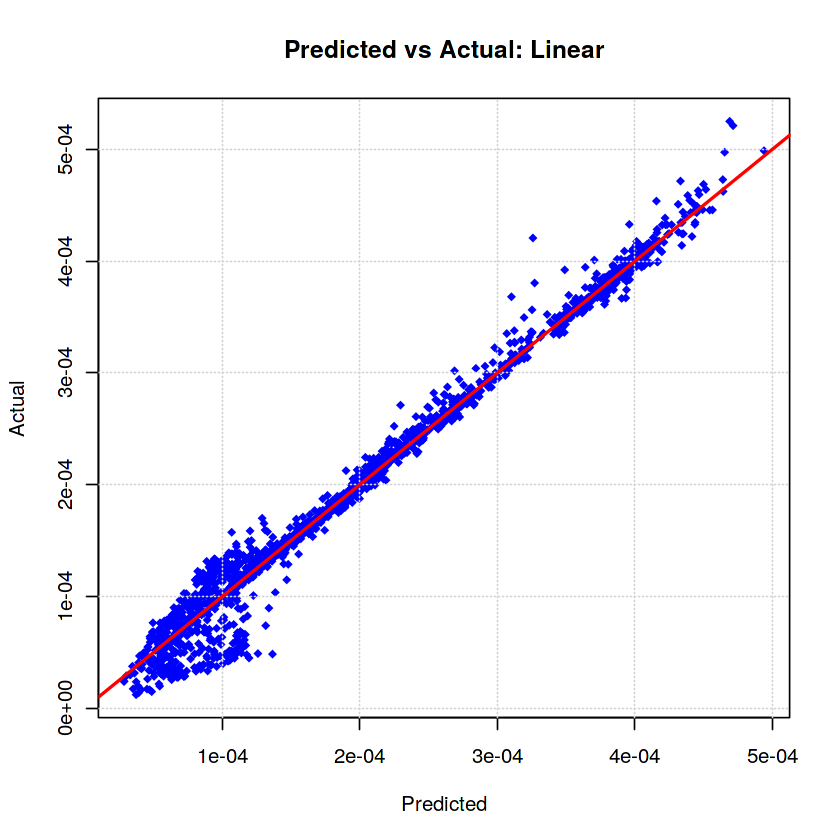

In [78]:
#Implementing Random Forest where I set mtry=no.of predictors/3
library(randomForest)
set.seed(999)
clv_rf<-randomForest(CLV~.,train,mtry=17,importance=TRUE,ntrees=500)
clv_rf
clv_rf_tst_pred<- predict(clv_rf, test)
plot(clv_rf_tst_pred, test$CLV,
    xlab= "Predicted", ylab= "Actual",
    main="Predicted vs Actual: Linear", col="blue", pch=18)
grid()
abline(0, 1, col = "red", lwd = 2)

summary(clv_rf)
#(lm_tst_rmse2 = calc_rmse(clv_lm_tst_pred2, test$CLV))#14.4812044544613
#summary(clv_lm2)$r.squared
postResample(clv_rf_tst_pred, test$CLV)

,%IncMSE
StateCalifornia,0.5263266
StateNevada,0.9095970
StateOregon,1.7928960
StateWashington,-2.2529638
ResponseYes,17.2455007
CoverageExtended,25.5343089
CoveragePremium,15.7421667
EducationCollege,5.9811984
EducationDoctor,2.5655416
EducationHigh.School.or.Below,4.5838335


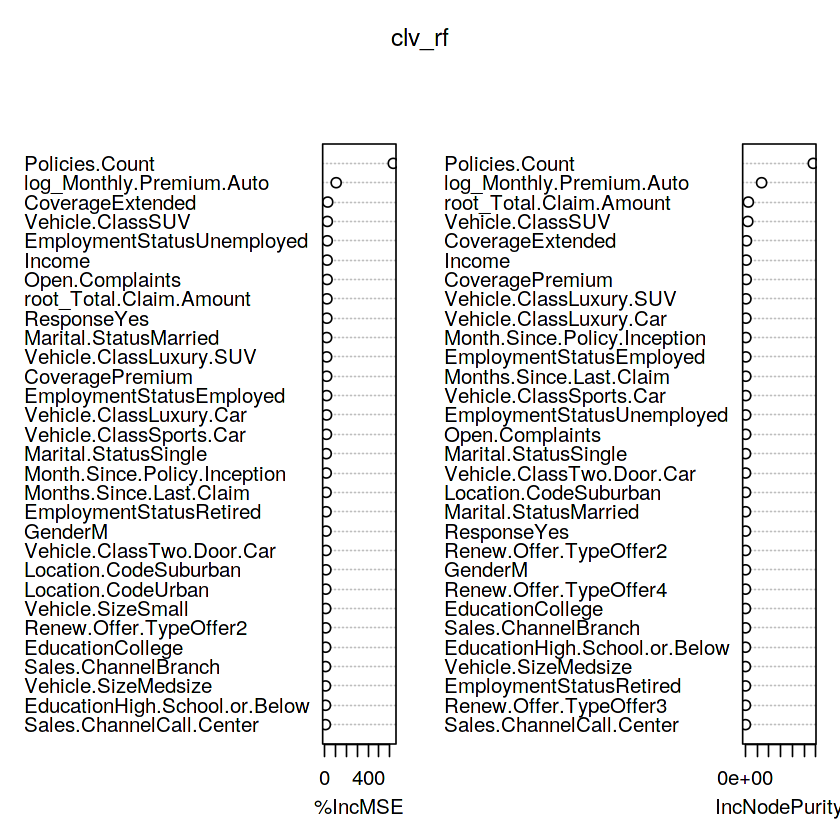

In [89]:
#Variable importance
importance(clv_rf,1)
varImpPlot(clv_rf,1)


Call:
 randomForest(formula = CLV ~ ., data = train, mtry = 48, importance = TRUE,      ntrees = 600) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 48

          Mean of squared residuals: 2.137484e-10
                    % Var explained: 98.24

RMSE     Rsquared          MAE 
1.437400e-05 9.829770e-01 8.045854e-06

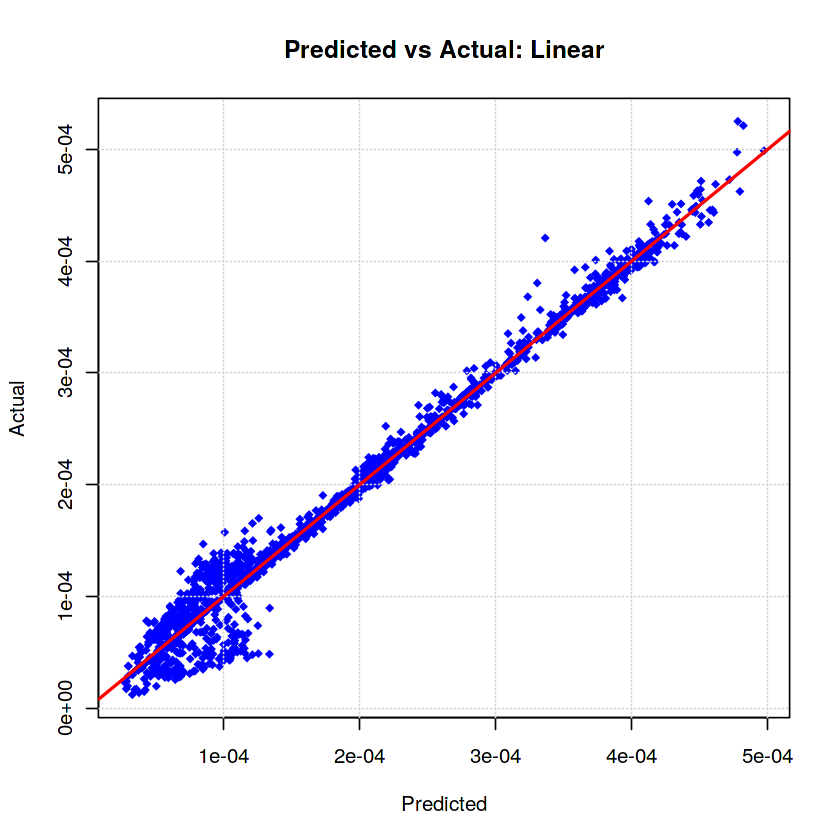

In [84]:
#Bagging: a special case of Random Forest where mtry=no. of predictors
set.seed(999)
clv_bag<-randomForest(CLV~.,train,mtry=50,importance=TRUE,ntrees=600)
clv_bag
clv_bag_tst_pred<- predict(clv_bag, test)
plot(clv_bag_tst_pred, test$CLV,
    xlab= "Predicted", ylab= "Actual",
    main="Predicted vs Actual: Linear", col="blue", pch=18)
grid()
abline(0, 1, col = "red", lwd = 2)
postResample(clv_bag_tst_pred, test$CLV)

In [ ]:
#Model Diagnostic and Assumption Check
#Linearity of the relationship between explanatory varibales and its target variable: residual vs fitted
#Error terms are normally distributed: Q-Q plot
plot(clv_rf)
#No correlation between variables: Autocorrelation Durbin-Watson
durbin.watson(clv_rf)
#Multicollinearity
corr<-cor(new_data)
print(corr)
highlyCorrelated<-findCorrelation(corr, cutoff=0.5)
print(highlyCorrelated)
names<-colnames(highlyCorrelated)
names
library(corrplot)
corrplot(corr, order="FPC", method="circle", type="lower", tl.cex=0.7, tl.col=rgb(0,0,0))
#alternative way of checking variable importance
#Previouly we have seen variable importance plot, checking p-value and statistical method- correlation plot
library(car)
vif(clv_rf)
#summary of the  model
#looking at adjusted R-squared and AIC-BIC
summary(clv_rf)
summary(clv_rf)$coeff
summary(clv_rf)$r.squared
summary(clv_rf)$adj.r.suared#'ll be more focus on that
#AIC(model3)
#BIC(model3)
#Model Diagnostic and Scoring
residuals<-resid(clv_rf)
predValues<-predict(clv_rf,test)
plot(test$CLV,residuals)
abline(0,0)
plot(test$CLV,predValues)

pred<-predict(clv_rf,test)
actual_pred<-data.frame(cbind(test$CLV,pred))
cor(actual_pred)
head(actual_pred)

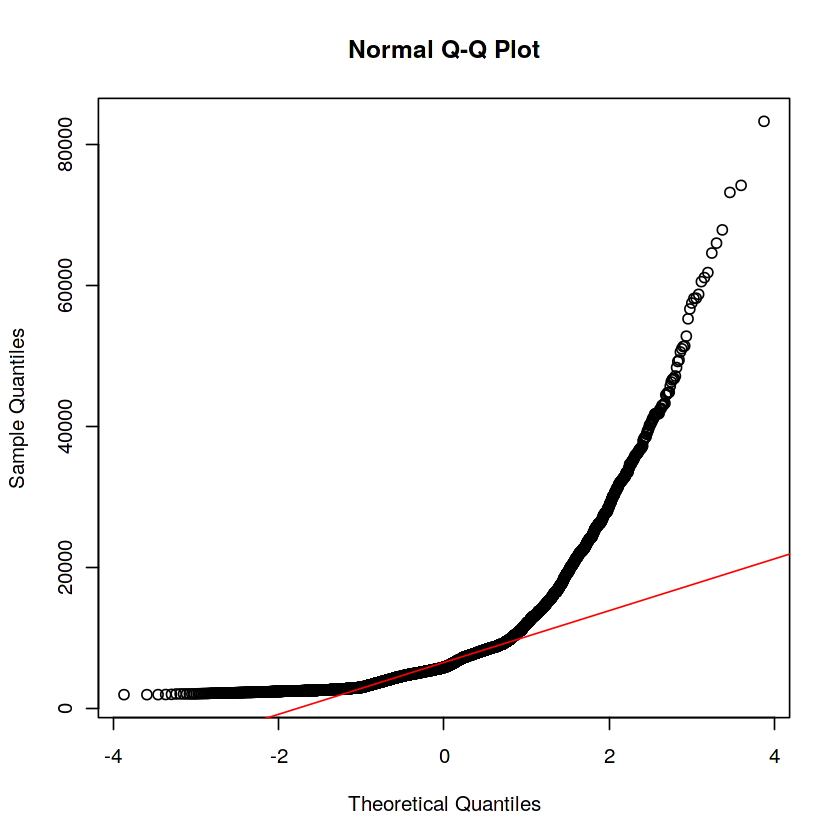

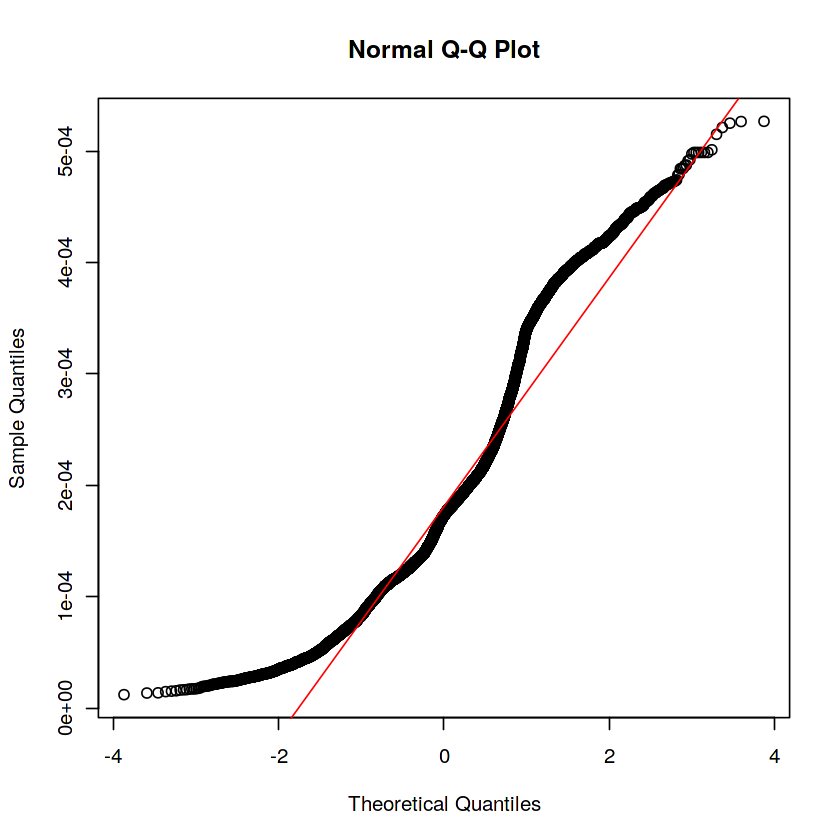

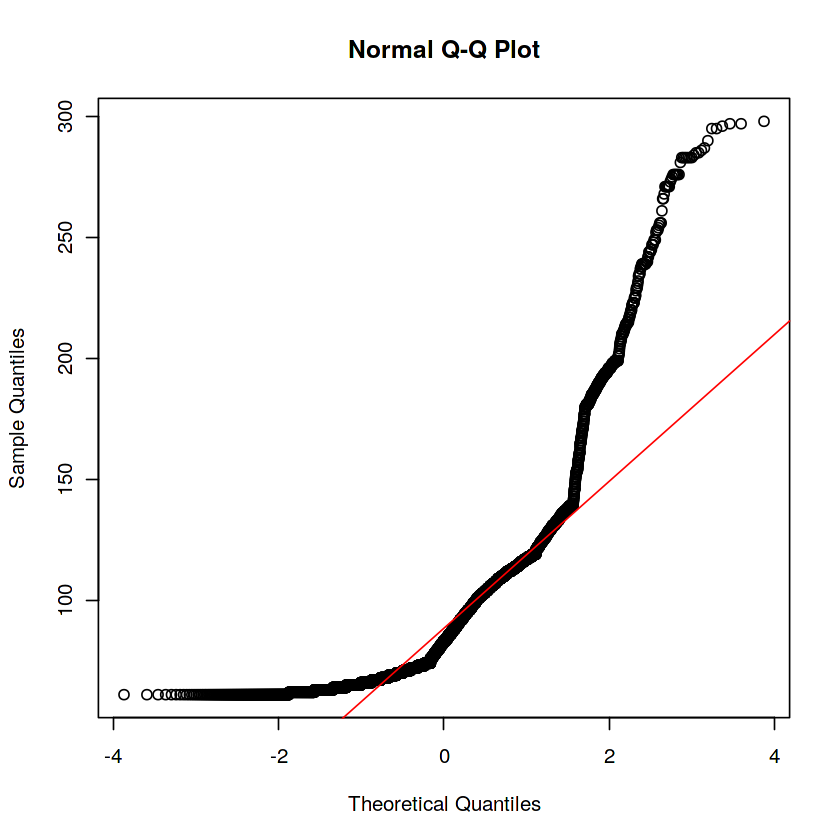

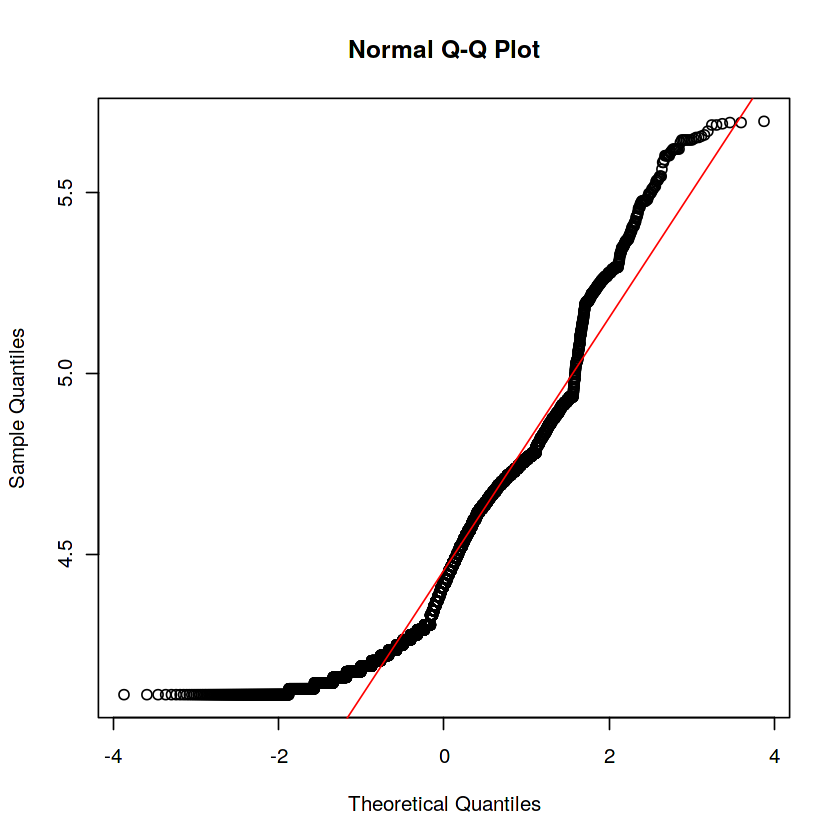

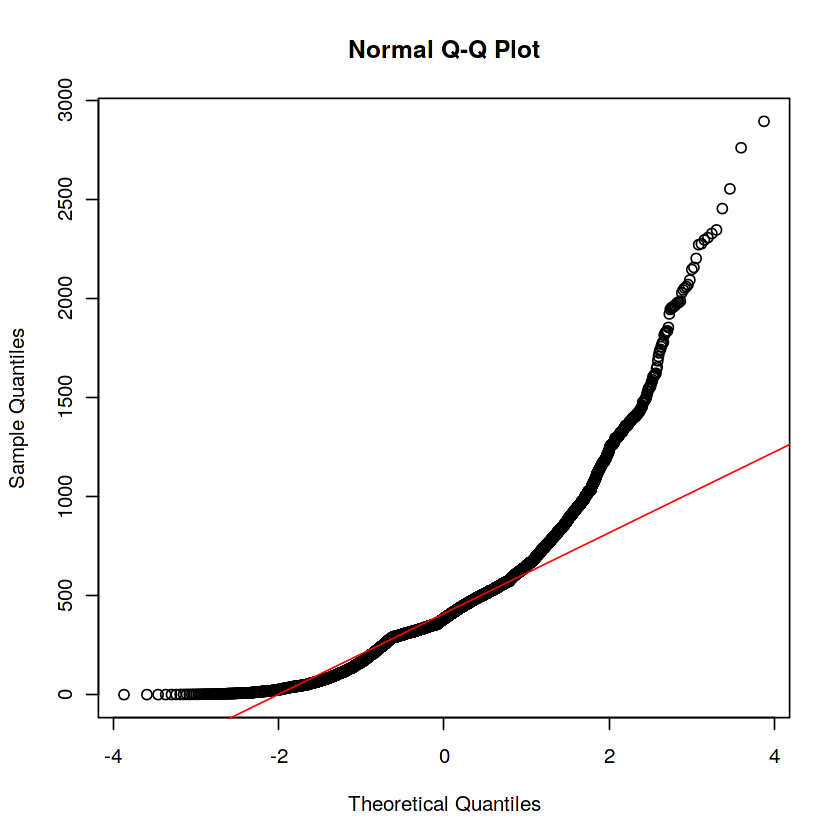

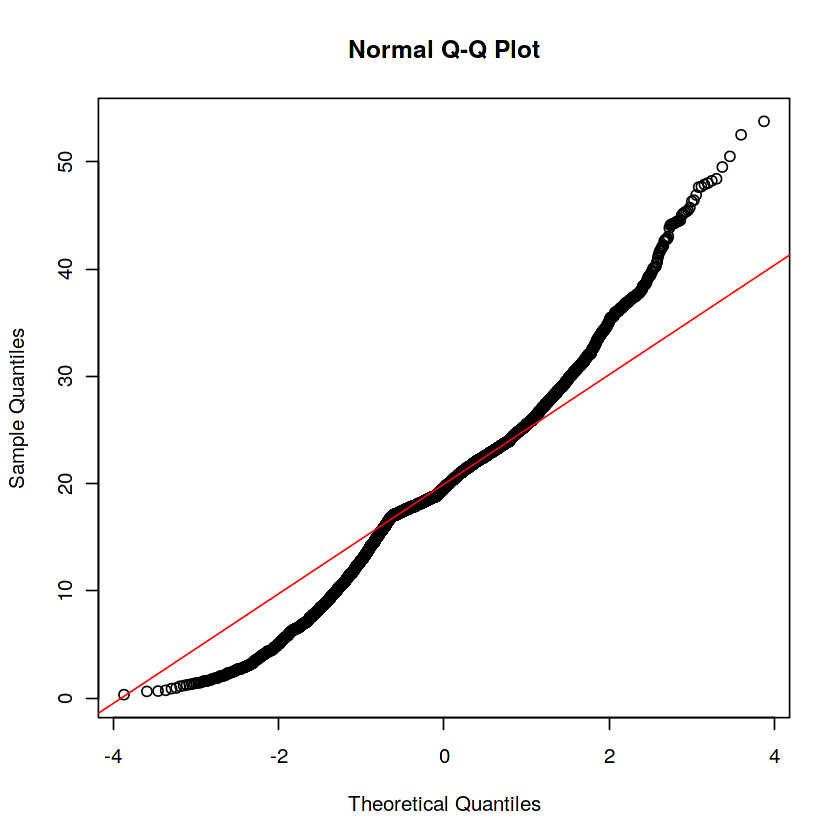

In [83]:
#Final Experiment with extreme gradient boosting

#For CLV variable I do reciprocal transformation for its non-normal distribution
qqnorm(data4$CLV)
qqline(data4$CLV, col="red")
data4['rec_clv']=1/data4$CLV
qqnorm(data4$rec_clv)
qqline(data4$rec_clv, col="red")

#Took log transformation
qqnorm(data4$Monthly.Premium.Auto)
qqline(data4$Monthly.Premium.Auto, col="red")
data4["log_Monthly.Premium.Auto"]=log(data4$Monthly.Premium.Auto)
qqnorm(data4$log_Monthly.Premium.Auto)
qqline(data4$log_Monthly.Premium.Auto, col="red")

#square root transformation
qqnorm(data4$Total.Claim.Amount)
qqline(data4$Total.Claim.Amount, col="red")
data4['root_Total.Claim.Amount']=sqrt(data4$Total.Claim.Amount)
qqnorm(data4$root_Total.Claim.Amount)
qqline(data4$root_Total.Claim.Amount, col="red")

In [88]:
#removing non-transformed variables
data4<-data4[,-c(2,11,20)]
#creating dummy variables
dmy<-dummyVars(rec_clv~.,data4,fullRank=TRUE)
X<-data.frame(predict(dmy,data4))
#Standardization
set.seed(99)
preprocessParams<-preProcess(X, method = c("center", "scale"))
X <- predict(preprocessParams, X)

X$CLV<-data4$rec_clv

set.seed(999)
index<-createDataPartition(X$CLV, p=0.75, list=FALSE)
train<-X[index,]
test<-X[-index,]

In [ ]:
#Hyper-parameter tuning
set.seed(999)
grid<-expand.grid(nrounds=500, max_depth=seq(6,10),eta=c(0.01,0.3,1),gamma=c(0,0.2,1),
                  colsample_bytree=c(0.5,0.8,1),min_child_weight=seq(1,10))
ontrol<-trainControl(method="repeatedcv", number=10, repeats=3)
clv_xgboost<-train(CLV~.,train,method="xgbTree",trControl=control,preProess=c("center","scale","BoxCox"),tuneGrid=grid)
test_data<-xgb.DMatrix(test[,-c("CLV")])
clv_xgboost_tst_pred<- predict(clv_xgboost, test_data)
plot(clv_xgboost_tst_pred, test$CLV,
    xlab= "Predicted", ylab= "Actual",
    main="Predicted vs Actual: Linear", col="blue", pch=18)
grid()
abline(0, 1, col = "red", lwd = 2)
postResample(clv_xgboost_tst_pred, test$CLV)